# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names. (The Lasso regression problem requires you to split the data yourself)
    1. Problem 1 uses datasets 1_1, 1_2 and 1_3. (Classification)
    2. Problem 2 uses datasets 2_1 and 2_2. (Classification)
    3. Problem 3 uses datasets 3_1. (Regression)
    4. Problem 4 uses a small dataset described within the problem itself. (Regression)
    5. Problems 5,6,7,8 uses classification datasets A,B,C,D  (Classification)
    6. Problem 9 uses dataset LassoReg_data (Regression)

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [2]:
# Cell type : CodeRead
import numpy as np
import matplotlib.pyplot as plt

**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
# Cell type : CodeWrite

# returns the (d x d) covariance matrix for the (n x d) shaped array
def get_covariance(X):
    
    # getting the mean for each dimension
    mu_X = X.mean(0)

    # Now creating the covariance matrix
    X_minus_mu = X - mu_X
    covariance = np.dot( (X_minus_mu).transpose(), (X_minus_mu) )

    # returns the covariance matrix
    return covariance/(len(X))

def multivariate_gaussian(x, mu, covariance):

    """ Inputs :  X -> (n x d) matrix ; mu -> (d x 1) matrix ; covariance -> (d x d) matrix """
    """ Output : (n x 1) matrix containing the probability value for each element in the matrix X """

    d = len(covariance) # dimension of the covariance matrix

    # this is the exp( x*(cov^-1)*(x) )
    x_m = x-mu
    value = ( x_m*np.matmul(x_m, np.linalg.inv(covariance)) ).sum(1)

    # The divisor in the exponential distribution
    Normalization_Value = (2*np.pi)**(d/2) * (np.linalg.det(covariance)**0.5) 

    return np.exp(-0.5*value)/Normalization_Value

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """

    d = len(X_train[0])

    # calculating mean for each type of numpy array
    mu_positive = X_train[Y_train == 1].mean(0)
    mu_negative = X_train[Y_train == -1].mean(0)

    # calculating the probability of P(y == 1) and P(y == -1)
    P_Y_1 = sum(Y_train == 1)/len(Y_train)
    P_Y_2 = sum(Y_train == -1)/len(Y_train)

    # Here covariance = Identity
    covariance = np.identity(d)

    # here calculating P(x) and P(X/Y=1) and P(X/Y=-1)
    P_of_x_given_y_positive = multivariate_gaussian(X_test, mu_positive, covariance)
    P_of_x_given_y_negative = multivariate_gaussian(X_test, mu_negative, covariance)
    P_of_x = P_Y_1*P_of_x_given_y_positive + P_Y_2*P_of_x_given_y_negative

    # Now calculating the P(Y=1/X)
    P_of_y_positive_given_x = (P_of_x_given_y_positive*P_Y_1)/P_of_x
    P_of_y_negative_given_x = (P_of_x_given_y_negative*P_Y_2)/P_of_x

    # print( np.vstack([P_of_y_positive_given_x,  P_of_y_negative_given_x]).sum(0) ) -> verified giving total probab == 1
    Prediction = np.array([ 1 if x>y else -1 for x,y in zip( P_of_y_positive_given_x,  P_of_y_negative_given_x) ])

    return Prediction
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    # calculating mean for each type of numpy array
    mu_positive = X_train[Y_train == 1].mean(0)
    mu_negative = X_train[Y_train == -1].mean(0)

    # calculating the probability of P(y == 1) and P(y == -1)
    P_Y_1 = sum(Y_train == 1)/len(Y_train)
    P_Y_2 = sum(Y_train == -1)/len(Y_train)

    # Here covariance = Identity
    covariance = get_covariance(X_train)

    # here calculating P(x) and P(X/Y=1) and P(X/Y=-1)
    P_of_x_given_y_positive = multivariate_gaussian(X_test, mu_positive, covariance)
    P_of_x_given_y_negative = multivariate_gaussian(X_test, mu_negative, covariance)
    P_of_x = P_Y_1*P_of_x_given_y_positive + P_Y_2*P_of_x_given_y_negative

    # Now calculating the P(Y=1/X)
    P_of_y_positive_given_x = (P_of_x_given_y_positive*P_Y_1)/P_of_x
    P_of_y_negative_given_x = (P_of_x_given_y_negative*P_Y_2)/P_of_x

    # print( np.vstack([P_of_y_positive_given_x,  P_of_y_negative_given_x]).sum(0) ) -> verified giving total probab == 1
    Prediction = np.array([ 1 if x>y else -1 for x,y in zip( P_of_y_positive_given_x,  P_of_y_negative_given_x) ])

    return Prediction

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    # calculating mean for each type of numpy array
    mu_positive = X_train[Y_train == 1].mean(0)
    mu_negative = X_train[Y_train == -1].mean(0)

    # calculating the probability of P(y == 1) and P(y == -1)
    P_Y_1 = sum(Y_train == 1)/len(Y_train)
    P_Y_2 = sum(Y_train == -1)/len(Y_train)

    # Here covariance = Identity
    covariance_positive = get_covariance(X_train[Y_train == 1])
    covariance_negative = get_covariance(X_train[Y_train == -1])

    # here calculating P(x) and P(X/Y=1) and P(X/Y=-1)
    P_of_x_given_y_positive = multivariate_gaussian(X_test, mu_positive, covariance_positive)
    P_of_x_given_y_negative = multivariate_gaussian(X_test, mu_negative, covariance_negative)
    P_of_x = P_Y_1*P_of_x_given_y_positive + P_Y_2*P_of_x_given_y_negative

    # Now calculating the P(Y=1/X)
    P_of_y_positive_given_x = (P_of_x_given_y_positive*P_Y_1)/P_of_x
    P_of_y_negative_given_x = (P_of_x_given_y_negative*P_Y_2)/P_of_x

    # print( np.vstack([P_of_y_positive_given_x,  P_of_y_negative_given_x]).sum(0) ) -> verified giving total probab == 1
    Prediction = np.array([ 1 if x>y else -1 for x,y in zip( P_of_y_positive_given_x,  P_of_y_negative_given_x) ])

    return Prediction

In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))


Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


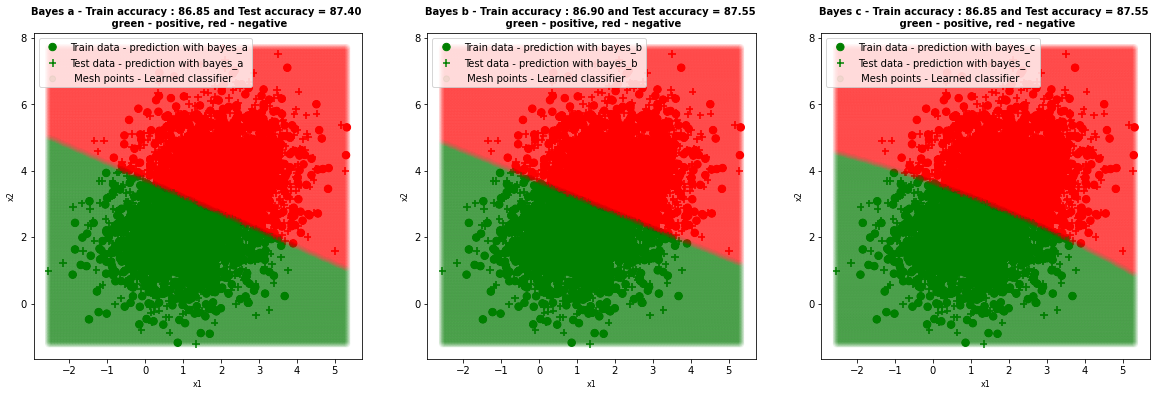

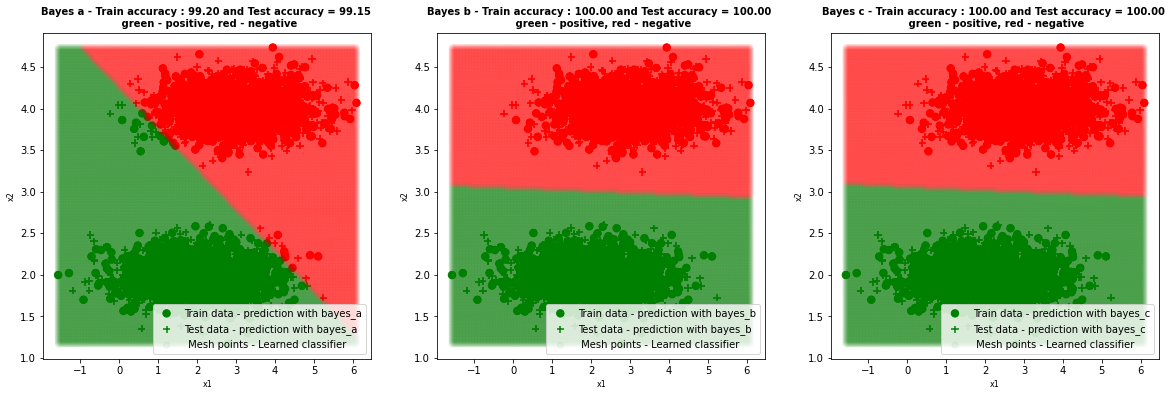

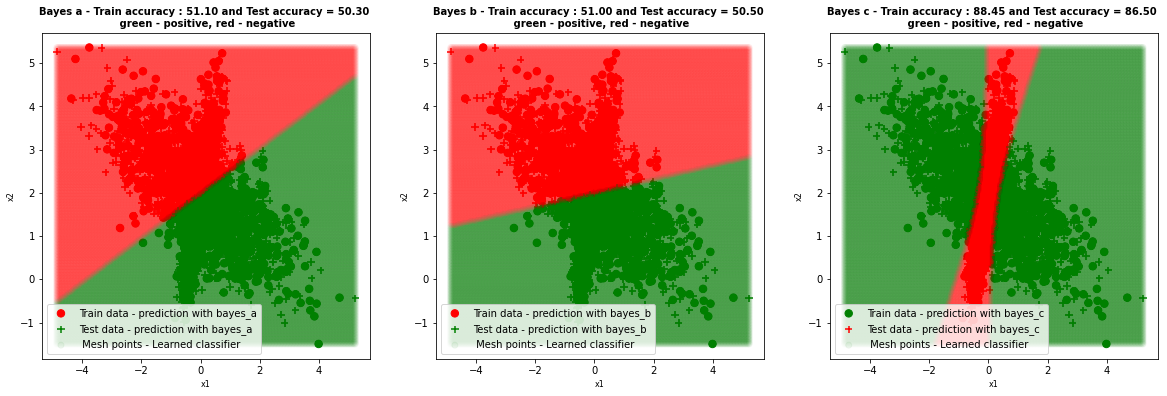

In [4]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

# Loading all of the data and later this data is used everywhere
root = "../../Data"

data = np.load(f"{root}/dataset1_1.npz")
data_arr_1_1 = []
for f in data: data_arr_1_1.append(data[f])

data = np.load(f"{root}/dataset1_2.npz")
data_arr_1_2 = []
for f in data: data_arr_1_2.append(data[f])

data = np.load(f"{root}/dataset1_3.npz")
data_arr_1_3 = []
for f in data: data_arr_1_3.append(data[f])

# Lading the other datasets as well
data = np.load(f"{root}/dataset2_1.npz")
data_arr_2_1 = []
for f in data: data_arr_2_1.append(data[f])

data = np.load(f"{root}/dataset2_2.npz")
data_arr_2_2 = []
for f in data: data_arr_2_2.append(data[f])

data = np.load(f"{root}/dataset3_1.npz")
data_arr_3_1 = []
for f in data: data_arr_3_1.append(data[f])

# Loading dataset A,B,C,D
data = np.load(f"{root}/dataset_A.npz")
data_arr_A = []
for f in data: data_arr_A.append(data[f])

data = np.load(f"{root}/dataset_B.npz")
data_arr_B = []
for f in data: data_arr_B.append(data[f])

data = np.load(f"{root}/dataset_C.npz")
data_arr_C = []
for f in data: data_arr_C.append(data[f])

data = np.load(f"{root}/dataset_D.npz")
data_arr_D = []
for f in data: data_arr_D.append(data[f])

data = np.load(f"{root}/LassoReg_data.npz")
data_arr_lasso = []
for f in data: data_arr_lasso.append(data[f])


def plot_data(data):

    """data - should be a array of X_train, Y_train, X_test, Y_test"""

    X_train, Y_train, X_test, Y_test = data
    # plotting the learned classifiers
    full_X1 = np.linspace( min( min(X_train[:,0]), min(X_test[:,0]) ) , max( max(X_train[:,0]), max(X_test[:,0]) ), 200 )
    full_X2 = np.linspace( min( min(X_train[:,1]), min(X_test[:,1]) ) , max( max(X_train[:,1]), max(X_test[:,1]) ), 200 )
    
    # creating mesh
    mesh_x1, mesh_x2 = np.meshgrid(full_X1, full_X2)
    mesh_x1 = mesh_x1.reshape(-1,1); mesh_x2 = mesh_x2.reshape(-1,1)

    # creating mesh points and its corresponding value
    mesh_points = np.hstack((mesh_x1,mesh_x2))

    # bayes a
    pred_y_train_bayes_a = Bayes1a(X_train, Y_train, X_train)
    pred_y_test_bayes_a = Bayes1a(X_train, Y_train, X_test)
    pred_train_a, pred_test_a = (Y_train == pred_y_train_bayes_a).astype(np.int32), (Y_test == pred_y_test_bayes_a).astype(np.int32)
    mesh_y_pred_bayes_a = Bayes1a(X_train, Y_train, mesh_points)

    train_accuracy_a = sum(pred_train_a)*100/len(Y_train)
    test_accuracy_a = sum(pred_test_a)*100/len(Y_test)

    # bayes b
    pred_y_train_bayes_b = Bayes1b(X_train, Y_train, X_train)
    pred_y_test_bayes_b = Bayes1b(X_train, Y_train, X_test)
    pred_train_b, pred_test_b = (Y_train == pred_y_train_bayes_b).astype(np.int32), (Y_test == pred_y_test_bayes_b).astype(np.int32)
    mesh_y_pred_bayes_b = Bayes1b(X_train, Y_train, mesh_points)

    train_accuracy_b = sum(pred_y_train_bayes_b == Y_train)*100/len(Y_train)
    test_accuracy_b = sum(pred_y_test_bayes_b == Y_test)*100/len(Y_test)

    # bayes c
    pred_y_train_bayes_c = Bayes1c(X_train, Y_train, X_train)
    pred_y_test_bayes_c = Bayes1c(X_train, Y_train, X_test)
    pred_train_c, pred_test_c = (Y_train == pred_y_train_bayes_c).astype(np.int32), (Y_test == pred_y_test_bayes_c).astype(np.int32)
    mesh_y_pred_bayes_c = Bayes1c(X_train, Y_train, mesh_points)

    train_accuracy_c = sum(pred_y_train_bayes_c == Y_train)*100/len(Y_train)
    test_accuracy_c = sum(pred_y_test_bayes_c == Y_test)*100/len(Y_test)

    # print(pred_y_test_bayes_c)

    colors = np.array(['red','green',"red"])

    # Now plotting the data
    plt.figure(figsize = (20,6))
    plt.subplot(1,3,1)
    plt.title(f"Bayes a - Train accuracy : {train_accuracy_a:.2f} and Test accuracy = {test_accuracy_a:.2f} \n green - positive, red - negative", fontweight = "bold", size = 10)
    plt.scatter(X_train[:,0], X_train[:,1], marker = "o", c = colors[pred_y_train_bayes_a], s = 55, label = "Train data - prediction with bayes_a", cmap = ['green','red'])
    plt.scatter(X_test[:,0], X_test[:,1], marker = "+", c = colors[pred_y_test_bayes_a], s = 55, label = "Test data - prediction with bayes_a", cmap = ['green','red'])
    plt.scatter(mesh_points[:,0], mesh_points[:,1], c = colors[mesh_y_pred_bayes_a], label = f" Mesh points - Learned classifier", alpha = 0.05)
    plt.xlabel("x1", size = 8); plt.ylabel("x2", size = 8)
    plt.legend(loc = 'best')

    plt.subplot(1,3,2)
    plt.title(f"Bayes b - Train accuracy : {train_accuracy_b:.2f} and Test accuracy = {test_accuracy_b:.2f} \n green - positive, red - negative", fontweight = "bold", size = 10)
    plt.scatter(X_train[:,0], X_train[:,1], marker = "o", c = colors[pred_y_train_bayes_b], s = 55, label = "Train data - prediction with bayes_b")
    plt.scatter(X_test[:,0], X_test[:,1], marker = "+", c = colors[pred_y_test_bayes_b], s = 55, label = "Test data - prediction with bayes_b")
    plt.scatter(mesh_points[:,0], mesh_points[:,1], c = colors[mesh_y_pred_bayes_b], label = f" Mesh points - Learned classifier", alpha = 0.05)
    plt.xlabel("x1", size = 8); plt.ylabel("x2", size = 8)
    plt.legend(loc = 'best')

    plt.subplot(1,3,3)
    plt.title(f"Bayes c - Train accuracy : {train_accuracy_c:.2f} and Test accuracy = {test_accuracy_c:.2f} \n green - positive, red - negative", fontweight = "bold", size = 10)
    plt.scatter(X_train[:,0], X_train[:,1], marker = "o", c = colors[pred_y_train_bayes_c], s = 55, label = "Train data - prediction with bayes_c")
    plt.scatter(X_test[:,0], X_test[:,1], marker = "+", c = colors[pred_y_test_bayes_c], s = 55, label = "Test data - prediction with bayes_c")
    plt.scatter(mesh_points[:,0], mesh_points[:,1], c = colors[mesh_y_pred_bayes_c], label = f" Mesh points - Learned classifier", alpha = 0.05)
    plt.xlabel("x1", size = 8); plt.ylabel("x2", size = 8)
    plt.legend(loc = 'best')

plot_data(data_arr_1_1)
plot_data(data_arr_1_2)
plot_data(data_arr_1_3)

<u>**Cell type : TextWrite**</u>
(Write your observations and table of errors here)

- <u>***Dataset 1***</u> :  All *`3 classifiers were able to perform well`* and almost similar, as the data is distribution (covariance matrix) almost similar for positive and negative classes. But they are not nicely separated, so the maximum accuracy we were able to achieve is around 87%

- <u>***Dataset 2***</u> : This is a well distributed dataset, *`positive and negatives have well separated distributions`* and doesn't overlap with each other as well, All 3 classifiers were able to perform very well in this dataset. We got maximum accuracy around 100% on test data. 

- The plot shows that for both dataset (1 and 2), the covariance matrix for distribution y = 1 and y = -1 are almost similar, therefore all of our classifiers were able to perform well.

- <u>***Dataset 3***</u> : This is a challenging dataset where, *`y = 1 and y = -1 has entirely different covariance matrix`* and has a skewed distribution. Therefore, very general methods with strong assumptions of covariance matrix, (methods 1 and 2) fail in this dataset. But our dataset 3 is able to perform well in the dataset, due to usage of unique covariance matrix for y = -1 and y = 1

- <u><b>*Error table is given below*</b></u>

| dataset | classifier 1 | classifier 2 | classifier 2 | 
| :- | - | - | - | 
| **dataset 1** | 12.6 | 12.45 | 12.45 |
| **dataset 2** | 0.85 | 0 | 0 |
| **dataset 3** | 49.70 | 49.50 | 13.50 |


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [99]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test, return_loss = False):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

    d = len(X_train[0])
    classes = set( np.reshape(Y_train,-1) )

    # calculating mean for each type of numpy array
    mu_classes = np.array([X_train[Y_train == k].mean(0) for k in classes])

    # calculating the probability of P(y == 1) and P(y == -1)
    P_Y_k = np.array([sum(Y_train == k)/len(Y_train) for k in classes])

    # Here covariance = Identity
    covariance = np.identity(d)

    # here calculating P(x) and P(X/Y=k) 
    P_of_x_given_y = np.array([multivariate_gaussian(X_test, mu_classes[i], covariance) for i in range(len(mu_classes))])
    P_of_x = np.sum( np.array([P_Y_k[i]*P_of_x_given_y[i] for i in range(len(classes))]) , axis = 0)

    # Now calculating the P(Y=k/X)
    P_of_y_k_given_x = np.array([(P_of_x_given_y[k]*P_Y_k[k])/P_of_x for k in range(len(classes))] ).transpose()
    # print(P_of_y_k_given_x.shape)

    # print(P_of_y_k_given_x.sum(1)) -> verified giving total probab == 1
    Prediction = np.argmin(np.matmul(P_of_y_k_given_x,L), axis = 1)
    Loss = np.min(np.matmul(P_of_y_k_given_x,L), axis = 1)
    
    return (Prediction+1,Loss) if return_loss else Prediction + 1
    
def Bayes2b(X_train, Y_train, X_test, return_loss = False):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

    d = len(X_train[0])
    classes = set( np.reshape(Y_train,-1) )

    # calculating mean for each type of numpy array
    mu_classes = np.array([X_train[Y_train == k].mean(0) for k in classes])

    # calculating the probability of P(y == 1) and P(y == -1)
    P_Y_k = np.array([sum(Y_train == k)/len(Y_train) for k in classes])

    # Here covariance = Identity
    covariance = get_covariance(X_train)

    # here calculating P(x) and P(X/Y=k) 
    P_of_x_given_y = np.array([multivariate_gaussian(X_test, mu_classes[i], covariance) for i in range(len(mu_classes))])
    P_of_x = np.sum( np.array([P_Y_k[i]*P_of_x_given_y[i] for i in range(len(classes))]) , axis = 0)

    # Now calculating the P(Y=k/X)
    P_of_y_k_given_x = np.array([(P_of_x_given_y[k]*P_Y_k[k])/P_of_x for k in range(len(classes))] ).transpose()
    # print(P_of_y_k_given_x.shape)

    # print(P_of_y_k_given_x.sum(1)) -> verified giving total probab == 1
    Prediction = np.argmin(np.matmul(P_of_y_k_given_x,L), axis = 1)
    Loss = np.min(np.matmul(P_of_y_k_given_x,L), axis = 1)
   
    return (Prediction+1,Loss) if return_loss else Prediction + 1

def Bayes2c(X_train, Y_train, X_test, return_loss = False):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

    d = len(X_train[0])
    classes = set( np.reshape(Y_train,-1) )

    # calculating mean for each type of numpy array
    mu_classes = np.array([X_train[Y_train == k].mean(0) for k in classes])

    # calculating the probability of P(y == 1) and P(y == -1)
    P_Y_k = np.array([sum(Y_train == k)/len(Y_train) for k in classes])

    # Here covariance = Identity
    covariance = np.array([get_covariance(X_train[Y_train == i]) for i in range(1,len(classes)+1)])

    # here calculating P(x) and P(X/Y=k) 
    P_of_x_given_y = np.array([multivariate_gaussian(X_test, mu_classes[i], covariance[i]) for i in range(len(mu_classes))])
    P_of_x = np.sum( np.array([P_Y_k[i]*P_of_x_given_y[i] for i in range(len(classes))]) , axis = 0)

    # Now calculating the P(Y=k/X)
    P_of_y_k_given_x = np.array([(P_of_x_given_y[k]*P_Y_k[k])/P_of_x for k in range(len(classes))] ).transpose()
    # print(P_of_y_k_given_x.shape)

    # print(P_of_y_k_given_x.sum(1)) -> verified giving total probab == 1
    Prediction = np.argmin(np.matmul(P_of_y_k_given_x,L), axis = 1)
    Loss = np.min(np.matmul(P_of_y_k_given_x,L), axis = 1)
    
    return (Prediction+1,Loss) if return_loss else Prediction + 1

In [100]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)

**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


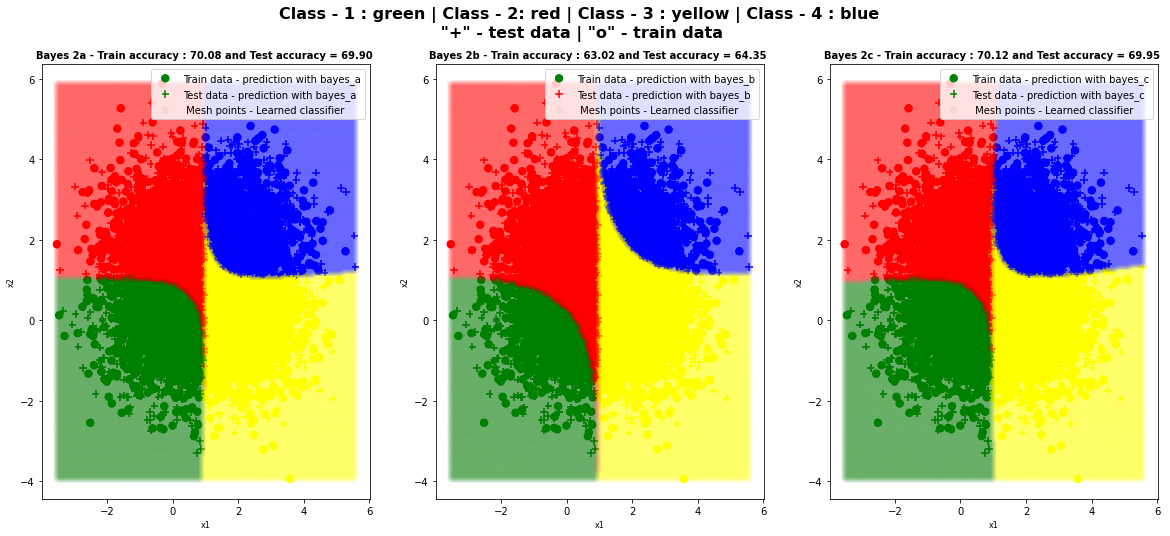

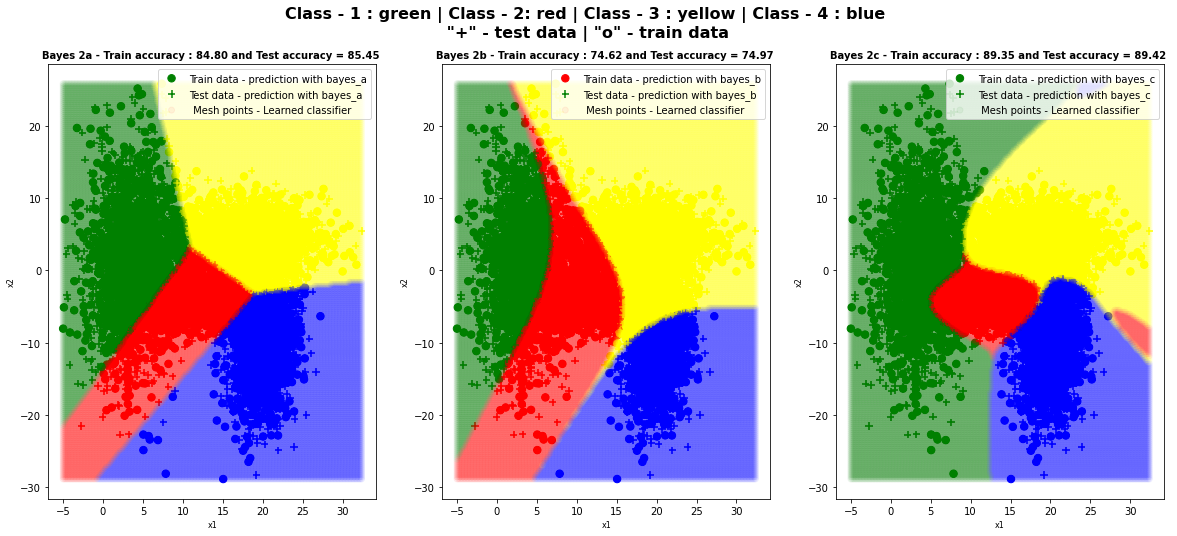

In [47]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

def get_confusion_matrix(data):

    X_train, Y_train, X_test, Y_test = data
    Y_test = Y_test.astype(np.int32)
    Y_train = Y_train.astype(np.int32)

    # bayes a
    pred_y_train_bayes_a = Bayes2a(X_train, Y_train, X_train)
    pred_y_test_bayes_a = Bayes2a(X_train, Y_train, X_test)
    confusion_test_a = np.zeros((4,4))
    confusion_train_a = np.zeros((4,4))
    for yp, yt in zip(pred_y_test_bayes_a, Y_test): confusion_test_a[yt-1][yp-1] += 1
    for yp, yt in zip(pred_y_train_bayes_a, Y_train): confusion_train_a[yt-1][yp-1] += 1

    # bayes b
    pred_y_train_bayes_b = Bayes2b(X_train, Y_train, X_train)
    pred_y_test_bayes_b = Bayes2b(X_train, Y_train, X_test)
    confusion_test_b = np.zeros((4,4))
    confusion_train_b = np.zeros((4,4))
    for yp, yt in zip(pred_y_test_bayes_b, Y_test): confusion_test_b[yt-1][yp-1] += 1
    for yp, yt in zip(pred_y_train_bayes_b, Y_train): confusion_train_b[yt-1][yp-1] += 1
    
    # bayes c
    pred_y_train_bayes_c = Bayes2c(X_train, Y_train, X_train)
    pred_y_test_bayes_c = Bayes2c(X_train, Y_train, X_test)
    confusion_test_c = np.zeros((4,4))
    confusion_train_c = np.zeros((4,4))
    for yp, yt in zip(pred_y_test_bayes_c, Y_test): confusion_test_c[yt-1][yp-1] += 1
    for yp, yt in zip(pred_y_train_bayes_c, Y_train): confusion_train_c[yt-1][yp-1] += 1

    return [confusion_train_a, confusion_test_a, confusion_train_b, confusion_test_b, confusion_train_c, confusion_test_c]


def plot_data(data):

    """data - should be a array of X_train, Y_train, X_test, Y_test"""

    X_train, Y_train, X_test, Y_test = data
    
    # plotting the learned classifiers
    full_X1 = np.linspace( min( min(X_train[:,0]), min(X_test[:,0]) ) , max( max(X_train[:,0]), max(X_test[:,0]) ), 200 )
    full_X2 = np.linspace( min( min(X_train[:,1]), min(X_test[:,1]) ) , max( max(X_train[:,1]), max(X_test[:,1]) ), 200 )
    
    # creating mesh
    mesh_x1, mesh_x2 = np.meshgrid(full_X1, full_X2)
    mesh_x1 = mesh_x1.reshape(-1,1); mesh_x2 = mesh_x2.reshape(-1,1)

    # creating mesh points and its corresponding value
    mesh_points = np.hstack((mesh_x1,mesh_x2))

    # bayes a
    pred_y_train_bayes_a = Bayes2a(X_train, Y_train, X_train)
    pred_y_test_bayes_a = Bayes2a(X_train, Y_train, X_test)
    mesh_y_pred_bayes_a = Bayes2a(X_train, Y_train, mesh_points)
    pred_train_a, pred_test_a = (Y_train == pred_y_train_bayes_a).astype(np.int32), (Y_test == pred_y_test_bayes_a).astype(np.int32)

    train_accuracy_a = sum(pred_train_a)*100/len(Y_train)
    test_accuracy_a = sum(pred_test_a)*100/len(Y_test)

    # bayes b
    pred_y_train_bayes_b = Bayes2b(X_train, Y_train, X_train)
    pred_y_test_bayes_b = Bayes2b(X_train, Y_train, X_test)
    mesh_y_pred_bayes_b = Bayes2b(X_train, Y_train, mesh_points)
    pred_train_b, pred_test_b = (Y_train == pred_y_train_bayes_b).astype(np.int32), (Y_test == pred_y_test_bayes_b).astype(np.int32)

    train_accuracy_b = sum(pred_y_train_bayes_b == Y_train)*100/len(Y_train)
    test_accuracy_b = sum(pred_y_test_bayes_b == Y_test)*100/len(Y_test)

    # bayes c
    pred_y_train_bayes_c = Bayes2c(X_train, Y_train, X_train)
    pred_y_test_bayes_c = Bayes2c(X_train, Y_train, X_test)
    mesh_y_pred_bayes_c = Bayes2c(X_train, Y_train, mesh_points)
    pred_train_c, pred_test_c = (Y_train == pred_y_train_bayes_c).astype(np.int32), (Y_test == pred_y_test_bayes_c).astype(np.int32)

    train_accuracy_c = sum(pred_y_train_bayes_c == Y_train)*100/len(Y_train)
    test_accuracy_c = sum(pred_y_test_bayes_c == Y_test)*100/len(Y_test)

    # Now getting the confusion matrix
    confusion_train_a, confusion_test_a, confusion_train_b, confusion_test_b, confusion_train_c, confusion_test_c = get_confusion_matrix(data)

    colors = np.array(['blank',"green","red","yellow","blue"])
    # print(f' Class - 1 : green ; Class - 2: red ; Class - 3 : yellow ; Class - 4 : blue \n "+" - test data | "o" - train data ')

    # Now plotting the data
    fig = plt.figure(figsize = (20,8))
    fig.suptitle('Class - 1 : green | Class - 2: red | Class - 3 : yellow | Class - 4 : blue \n "+" - test data | "o" - train data ', fontsize=16, fontweight = 'bold')

    plt.subplot(1,3,1)
    plt.title(f"Bayes 2a - Train accuracy : {train_accuracy_a:.2f} and Test accuracy = {test_accuracy_a:.2f} ", fontweight = "bold", size = 10)
    plt.scatter(X_train[:,0], X_train[:,1], marker = "o", c = colors[pred_y_train_bayes_a], s = 55, label = "Train data - prediction with bayes_a")
    plt.scatter(X_test[:,0], X_test[:,1], marker = "+", c = colors[pred_y_test_bayes_a], s = 55, label = "Test data - prediction with bayes_a")
    plt.scatter(mesh_points[:,0], mesh_points[:,1], c = colors[mesh_y_pred_bayes_a], label = f" Mesh points - Learned classifier", alpha = 0.05)
    plt.xlabel("x1", size = 8); plt.ylabel("x2", size = 8)
    plt.legend(loc = 'best')

    plt.subplot(1,3,2)
    plt.title(f"Bayes 2b - Train accuracy : {train_accuracy_b:.2f} and Test accuracy = {test_accuracy_b:.2f} ", fontweight = "bold", size = 10)
    plt.scatter(X_train[:,0], X_train[:,1], marker = "o", c = colors[pred_y_train_bayes_b], s = 55, label = "Train data - prediction with bayes_b")
    plt.scatter(X_test[:,0], X_test[:,1], marker = "+", c = colors[pred_y_test_bayes_b], s = 55, label = "Test data - prediction with bayes_b")
    plt.scatter(mesh_points[:,0], mesh_points[:,1], c = colors[mesh_y_pred_bayes_b], label = f" Mesh points - Learned classifier", alpha = 0.05)
    plt.xlabel("x1", size = 8); plt.ylabel("x2", size = 8)
    plt.legend(loc = 'best')

    plt.subplot(1,3,3)
    plt.title(f"Bayes 2c - Train accuracy : {train_accuracy_c:.2f} and Test accuracy = {test_accuracy_c:.2f} ", fontweight = "bold", size = 10)
    plt.scatter(X_train[:,0], X_train[:,1], marker = "o", c = colors[pred_y_train_bayes_c], s = 55, label = "Train data - prediction with bayes_c")
    plt.scatter(X_test[:,0], X_test[:,1], marker = "+", c = colors[pred_y_test_bayes_c], s = 55, label = "Test data - prediction with bayes_c")
    plt.scatter(mesh_points[:,0], mesh_points[:,1], c = colors[mesh_y_pred_bayes_c], label = f" Mesh points - Learned classifier", alpha = 0.05)
    plt.xlabel("x1", size = 8); plt.ylabel("x2", size = 8)
    plt.legend(loc = 'best')

    plt.show()

plot_data(data_arr_2_1)
plot_data(data_arr_2_2)

<u>**Cell type : TextWrite**</u>
(Write your observations and table of errors here)

- <u>***Dataset 2-1***</u> :  All 3 classifiers were able to perform well and they performed more less similar in terms of accuracy. However, classifier 3 is able to perform better with 69% accuracy as it is using separate covariance matrix for different classes

- <u>***Dataset 2-2***</u> :  Here, all 3 classifiers clearly visible different boundaries for different classes, this shows that for this dataset, the covariance matrix for each class is different form each other. As this is a challenging dataset, classifier 3 is able to perform better with separate covariance matrix and one important note here is classifier 1 performed better than classifier 2, which tells us that assumption of identity covariance matrix is better than common covariance calculated from train data

- <u>***Conclusion***</u> : In general, **`classifier 3 (bayes c) is more robust`** and perform well in different kind of datasets


- <u><b>*Error (Mean Error)  table is given below*</b></u>

| dataset | classifier 1 | classifier 2 | classifier 2 | 
| :- | - | - | - | 
| **dataset 2-1** | 0.446 | 0.691 | 0.450 |
| **dataset 2-2** | 0.012 | 0.607 | 0.138 |

- <u><b>*Confusion matrix  table is given below*</b></u>

<u>***Dataset 2-1 Bayes 2a***</u>

|       | Y=1 | Y=2 | Y=3 | Y=4 |
|-------|-------|-------|-------|-------|
| **Y=1** | **633** | 219 | 136 | 12 |
| **Y=2** | 97 | **738** | 62 | 103 |
| **Y=3** | 86 | 49 | **770** | 95 |
| **Y=4** | 15 | 136 | 194 | **655** |

<u>***Dataset 2-1 Bayes 2b***</u>

|       | Y=1 | Y=2 | Y=3 | Y=4 |
|-------|-------|-------|-------|-------|
| **Y=1** | **464** | 387 | 145 |   4 |
| **Y=2** | 43 | **791** | 113 |  53 |
| **Y=3** | 40 |  95 | **818** |  47 |
| **Y=4** |  4 | 149 | 346 | **501** |

<u>***Dataset 2-1 Bayes 2c***</u>

|       | Y=1 | Y=2 | Y=3 | Y=4 |
|-------|-------|-------|-------|-------|
| **Y=1** | **634** | 217 | 138 |  11 |
| **Y=2** | 99 | **742** |  61 |  98 |
| **Y=3** | 87 |  47 | **772** |  94 |
| **Y=4** | 15 | 134 | 201 | **650** |

<u>***Dataset 2-2 Bayes 2a***</u>

|       | Y=1 | Y=2 | Y=3 | Y=4 |
|-------|-------|-------|-------|-------|
| **Y=1** | **830** | 150 |  18 |   2 |
| **Y=2** | 93 | **784** |  46 |  77 |
| **Y=3** | 30 |  61 | **905** |   4 |
| **Y=4** | 0 |  23 |  78 | **899** |

<u>***Dataset 2-2 Bayes 2b***</u>

|       | Y=1 | Y=2 | Y=3 | Y=4 |
|-------|-------|-------|-------|-------|
| **Y=1** | **675** | 302 |  23 |   0 |
| **Y=2** | 39 | **749** | 205 |   7 |
| **Y=3** |  7 | 118 | **875** |   0 |
| **Y=4** | 0 |   3 | 297 | **700** |

<u>***Dataset 2-2 Bayes 2c***</u>

|       | Y=1 | Y=2 | Y=3 | Y=4 |
|-------|-------|-------|-------|-------|
| **Y=1** | **901** |  80 |  19 |   0 |
| **Y=2** | 64 | **824** |  46 |  66 |
| **Y=3** | 19 |  31 | **936** |  14 |
| **Y=4** | 0 |  36 |  48 | **916** |

In [102]:
# Cell type: convenience

# _,l1 = Bayes2a(data_arr_2_1[0], data_arr_2_1[1], data_arr_2_1[2], return_loss = True)
# _,l2 = Bayes2b(data_arr_2_1[0], data_arr_2_1[1], data_arr_2_1[2], return_loss = True)
# _,l3 = Bayes2c(data_arr_2_1[0], data_arr_2_1[1], data_arr_2_1[2], return_loss = True)

# _,g1 = Bayes2a(data_arr_2_2[0], data_arr_2_2[1], data_arr_2_2[2], return_loss = True)
# _,g2 = Bayes2b(data_arr_2_2[0], data_arr_2_2[1], data_arr_2_2[2], return_loss = True)
# _,g3 = Bayes2c(data_arr_2_2[0], data_arr_2_2[1], data_arr_2_2[2], return_loss = True)

# print( (l1).mean(), (l2).mean(), (l3).mean() )
# print( (g1).mean(), (g2).mean(), (g3).mean() )

# confusion_train_a, confusion_test_a, confusion_train_b, confusion_test_b, confusion_train_c, confusion_test_c = get_confusion_matrix(data_arr_2_2)

**Cell type : TextRead**


# Problem 3 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset3_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the approppriate number samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




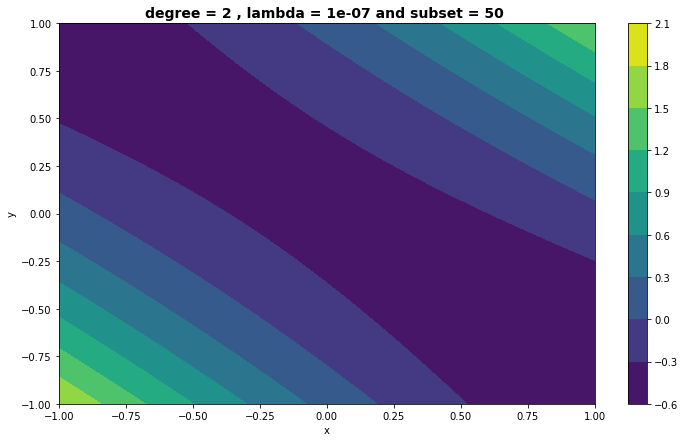

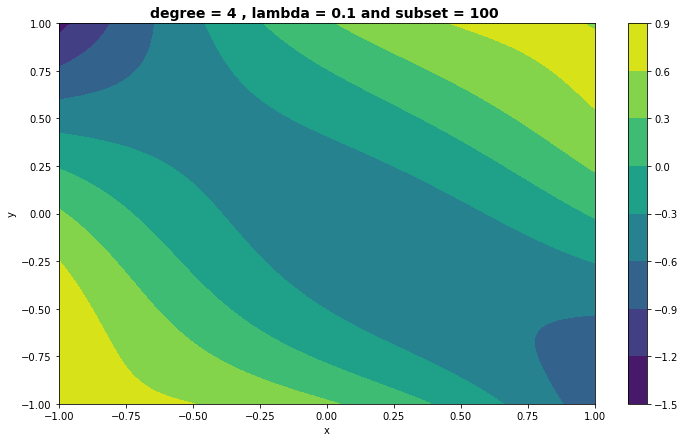

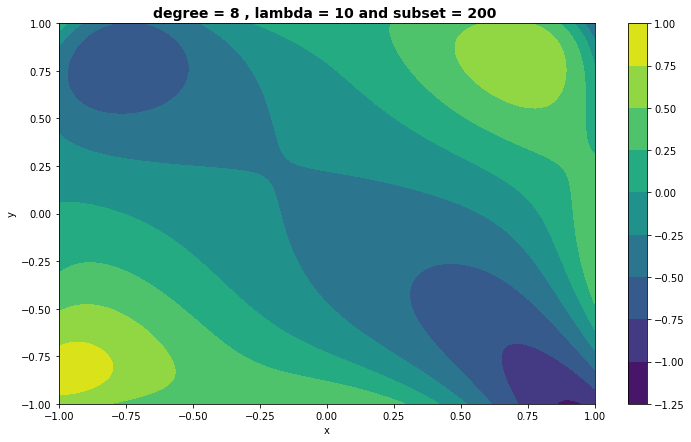

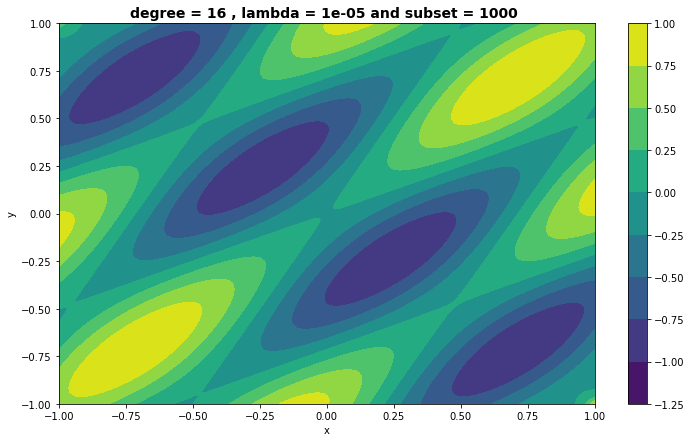

In [9]:
def Linear_kernel(degree, u, v): return (u@v.T + 1)**degree

def find_poly_fit(X_train, Y_train, X_test, Y_test = [], degree = 1, lamb = 1, subset_size = 50, return_alpha = False):

    # getting the subset
    indices = np.array([x for x in range(0,len(Y_train))])

    np.random.seed(15)
    np.random.shuffle(indices)
    
    subset_index = indices[:subset_size]
    X_train = X_train[subset_index]
    Y_train = Y_train[subset_index]

    # calculating the K value
    K = Linear_kernel(degree, X_train, X_train)

    # calculating the (K + lambda*I)
    K_lambda_I = (K + lamb*np.identity(len(K)))

    # calculating alpha
    alpha = np.linalg.inv(K_lambda_I)@Y_train

    # print(alpha.shape)

    # predicting value
    y_pred = alpha@Linear_kernel(degree, X_train, X_test)
    y_train_pred = alpha@Linear_kernel(degree, X_train, X_train)

    # now calculating the error
    test_error = np.mean((Y_test-y_pred)**2) if len(Y_test) == len(X_test) else -1
    train_error = np.mean((Y_train-y_train_pred)**2)
    # print(train_error, test_error)

    return (alpha, subset_index, train_error, test_error) if return_alpha else (train_error, test_error)

data = np.load("./dataset3_1.npz")
data_arr_3 = []
for f in data: data_arr_3.append(data[f])

X_train, Y_train, X_test, Y_test = data_arr_3

X_train = np.append( X_train, np.ones((len(X_train),1)) , axis = 1)
X_test = np.append( X_test, np.ones((len(X_test),1)), axis = 1)


def get_regression_error(data, subset):

    degrees = [1, 2, 4, 8, 16]
    lambdas = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]

    X_train, Y_train, X_test, Y_test = data
    train_loss, test_loss = np.zeros((5,6)), np.zeros((5,6))

    # Now calculating the regression loss 
    for i,deg in enumerate(degrees):
        for j,lamb in enumerate(lambdas):
            train_loss[i,j], test_loss[i,j] = find_poly_fit(X_train, Y_train, X_test, Y_test, deg, lamb, subset) 
    
    return train_loss, test_loss

def plot_regression(X_train, Y_train, X_test, degree, lamb, subset):

    # Learning the function based in given data and hyper parameter
    alpha,subset_index,_,_ = find_poly_fit(X_train, Y_train, X_test, degree = degree, lamb = lamb, subset_size = subset, return_alpha = True)
    X_train = X_train[subset_index]

    # Now making the grid
    nx, ny = (100, 100)
    x = np.linspace(-1, 1, nx)
    y = np.linspace(-1, 1, ny)
    x_grid, y_grid = np.meshgrid(x,y)

    z = np.zeros((nx,ny))

    for i,x1 in enumerate(x):
        for j,x2 in enumerate(y):
            z[i][j] = alpha@Linear_kernel(degree, X_train, np.array([[x1,x2]]))
    
    # print(x_grid.shape, y_grid.shape, z.shape)
    plt.figure(figsize = (12,7))
    plt.title(f"degree = {degree} , lambda = {lamb} and subset = {subset} ", fontweight = "bold", size = 14)

    plt.contourf(x_grid, y_grid, z)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar()
    plt.show()

plot_regression(data_arr_3_1[0], data_arr_3_1[1], data_arr_3_1[2], 2, 1e-7, 50)
plot_regression(data_arr_3_1[0], data_arr_3_1[1], data_arr_3_1[2], 4, 1e-1, 100)
plot_regression(data_arr_3_1[0], data_arr_3_1[1], data_arr_3_1[2], 8, 10, 200)
plot_regression(data_arr_3_1[0], data_arr_3_1[1], data_arr_3_1[2], 16, 1e-5, 1000)

**Cell type : TextWrite**

**``Error metric : MSE (Mean Squared Error)``**

<u> ***Subset = 50 | Train Error*** </u>

| degree / lambda |1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0|
| --- | --- | --- | --- | --- | --- | --- |
|**1**|2.210e-01|2.643e-01|2.035e-01|2.157e-01|1.897e-01|2.841e-01|
|**2**|1.334e-01|1.254e-01|1.268e-01|1.228e-01|1.092e-01|1.803e-01|
|**4**|9.493e-02|7.961e-02|6.878e-02|9.113e-02|9.115e-02|1.308e-01|
|**8**|1.052e-03|4.474e-05|1.981e-03|9.607e-03|3.843e-02|8.958e-02|
|**16**|9.395e-07|**`3.862e-12`**|1.039e-09|6.247e-06|1.649e-03|2.109e-02|

<u> ***Subset = 50 | Test Error*** </u>

| degree / lambda |1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0|
| --- | --- | --- | --- | --- | --- | --- |
|**1**|2.801e-01|2.682e-01|2.674e-01|2.669e-01|2.664e-01|2.644e-01|
|**2**|1.634e-01|**`1.499e-01`**|1.788e-01|1.681e-01|2.094e-01|1.816e-01|
|**4**|3.124e-01|2.563e-01|2.670e-01|2.874e-01|1.602e-01|1.621e-01|
|**8**|8.088e+02|5.821e+02|3.542e+01|5.616e+00|1.741e+00|8.037e-01|
|**16**|2.967e+02|2.135e+03|3.039e+02|4.703e+02|1.714e+02|5.076e+01|

<u> ***Subset = 100 | Train Error*** </u>

| degree / lambda |1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0|
| --- | --- | --- | --- | --- | --- | --- |
|**1**|2.375e-01|2.724e-01|1.893e-01|2.432e-01|2.303e-01|2.800e-01|
|**2**|1.139e-01|1.151e-01|1.242e-01|1.354e-01|1.392e-01|1.587e-01|
|**4**|1.130e-01|1.118e-01|1.050e-01|1.074e-01|1.182e-01|1.251e-01|
|**8**|4.418e-02|1.401e-02|1.249e-02|1.598e-02|4.803e-02|8.415e-02|
|**16**|**`1.777e-13`**|1.723e-09|3.401e-07|5.474e-05|2.284e-03|2.610e-02|

<u> ***Subset = 100 | Test Error*** </u>

| degree / lambda |1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0|
| --- | --- | --- | --- | --- | --- | --- |
|**1**|2.651e-01|2.770e-01|2.732e-01|2.760e-01|2.671e-01|2.633e-01|
|**2**|1.566e-01|1.479e-01|1.662e-01|1.635e-01|1.470e-01|1.663e-01|
|**4**|1.606e-01|1.834e-01|1.627e-01|1.476e-01|**`1.396e-01`**|1.606e-01|
|**8**|3.723e-01|6.890e+00|3.079e+00|6.870e-01|6.739e+00|2.393e-01|
|**16**|6.132e+02|1.947e+01|1.010e+02|2.635e+03|2.203e+02|4.544e+01|

<u> ***Subset = 200 | Train Error*** </u>

| degree / lambda |1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0|
| --- | --- | --- | --- | --- | --- | --- |
|**1**|2.784e-01|2.484e-01|2.822e-01|2.193e-01|2.360e-01|2.451e-01|
|**2**|1.251e-01|1.414e-01|1.356e-01|1.259e-01|1.265e-01|1.458e-01|
|**4**|1.123e-01|1.108e-01|1.240e-01|1.183e-01|1.031e-01|1.248e-01|
|**8**|4.975e-02|6.759e-02|4.907e-02|5.047e-02|5.808e-02|1.049e-01|
|**16**|5.317e-02|**`5.382e-08`**|4.858e-07|5.699e-05|2.221e-03|2.708e-02|

<u> ***Subset = 200 | Test Error*** </u>

| degree / lambda |1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0|
| --- | --- | --- | --- | --- | --- | --- |
|**1**|2.628e-01|2.671e-01|2.672e-01|2.657e-01|2.632e-01|2.652e-01|
|**2**|1.520e-01|1.446e-01|1.445e-01|1.461e-01|1.503e-01|1.522e-01|
|**4**|1.359e-01|1.386e-01|1.392e-01|1.472e-01|1.521e-01|1.441e-01|
|**8**|1.658e-01|1.738e-01|1.937e-01|4.417e-01|1.328e-01|**`1.235e-01`**|
|**16**|1.429e+00|2.983e+00|1.139e+00|5.603e+00|5.142e+00|1.423e-01|

<u> ***Subset = 1000 | Train Error*** </u>

| degree / lambda |1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0|
| --- | --- | --- | --- | --- | --- | --- |
|**1**|2.407e-01|2.407e-01|2.407e-01|2.407e-01|2.407e-01|2.407e-01|
|**2**|1.388e-01|1.388e-01|1.388e-01|1.388e-01|1.388e-01|1.393e-01|
|**4**|1.250e-01|1.250e-01|1.250e-01|1.250e-01|1.250e-01|1.262e-01|
|**8**|7.674e-02|7.674e-02|7.674e-02|7.674e-02|7.703e-02|9.643e-02|
|**16**|1.201e+02|3.840e-04|**`2.355e-06`**|4.101e-05|1.210e-03|1.873e-02|

<u> ***Subset = 1000 | Test Error*** </u>

| degree / lambda |1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0|
| --- | --- | --- | --- | --- | --- | --- |
|**1**|2.625e-01|2.625e-01|2.625e-01|2.625e-01|2.625e-01|2.625e-01|
|**2**|1.424e-01|1.424e-01|1.424e-01|1.424e-01|1.424e-01|1.436e-01|
|**4**|1.271e-01|1.271e-01|1.271e-01|1.271e-01|1.271e-01|1.297e-01|
|**8**|8.482e-02|8.481e-02|8.481e-02|8.481e-02|8.477e-02|1.013e-01|
|**16**|1.114e+02|4.543e-04|**`4.756e-05`**|1.274e-03|6.384e-03|2.587e-02|

<u> ***Findings and Conclusion*** </u>

- For **Subset size = 50**, Train error is very low for degree = 16 and 8, but very high test error has been observed , this may be due to over-fitting  with very less datapoints. Best hyperparameter for less test error is : **`degree = 2 , lambda = 1e-7 for subset = 50`**

- For **subset size = 100** as well overfitting occurs at degree 16 and 8, Best hyperparameter for less test error is : **`degree = 4 , lambda = 1e-1 for subset = 100`**

- For **subset size = 200** overfitting got reduced for higher degree, and higher degree has less error for test set as well.
Best hyperparameter for less test error is : **`degree = 8 , lambda = 10 for subset = 200`**

- For **subset size = 1000** overfitting does not occurs due to high data points and the best hyperparameter observed is : **`degree = 16 , lambda = 1e-5 for subset = 1000`**

- As the number of **`data points increases, overfitting in higher degrees decreases`** and higher degree polynomial kernels gives good results

- Very low lambda value often leads to overfitting, but very high values of lambda leads to underfitting, so middle values of lamda like 1e-7, 1e-5, 1e-1, 1.0 gives good results in general

**Cell type : TextRead**


# Problem 4 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell. e.g. what happens when tau, sigma and number of data points are increased.

Hint 1: In class we saw the expression for posterior of W, but only used it to find the MAP estimate. But it can be analysed in greater detail. You may read up classic textbooks like Bishop to figure out the posterior or work it out yourself. This is not too hard.

Hint 2: In particular, observe that the posterior looks like a product of exponential functions, and the term inside the exponent is always a degree 2 (or less) function of w. Can you think of any distribution which looks like that?











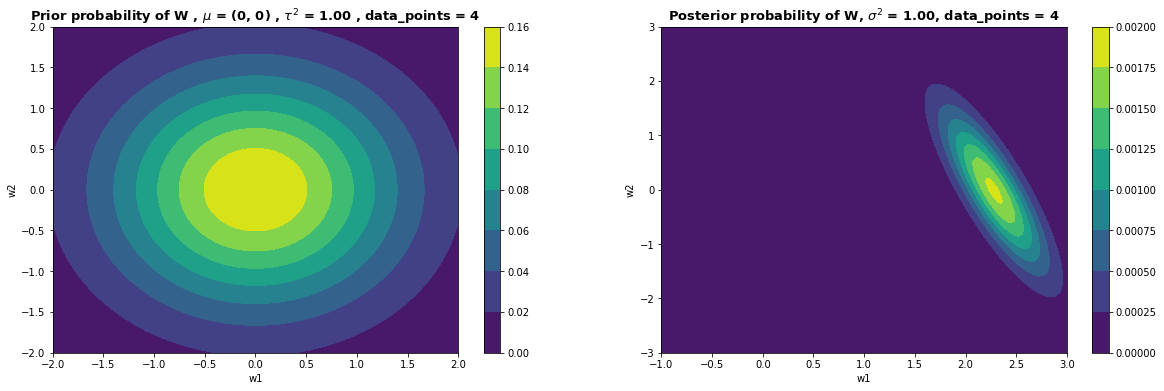

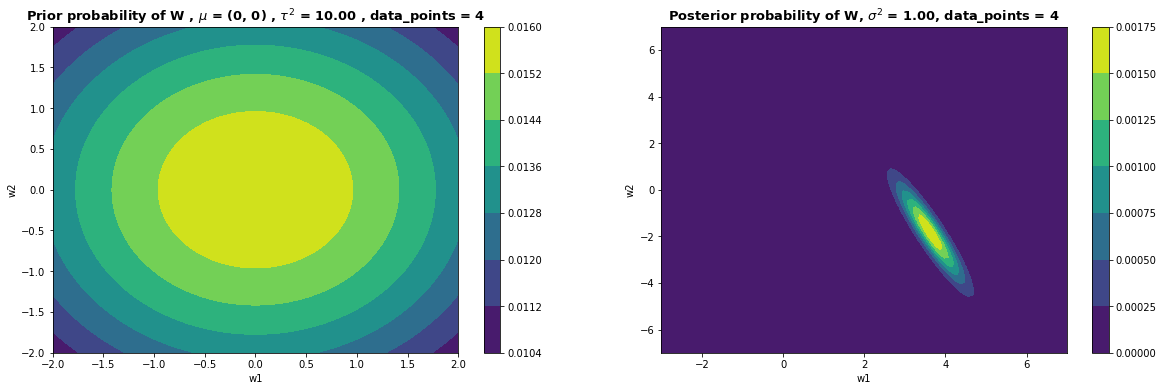

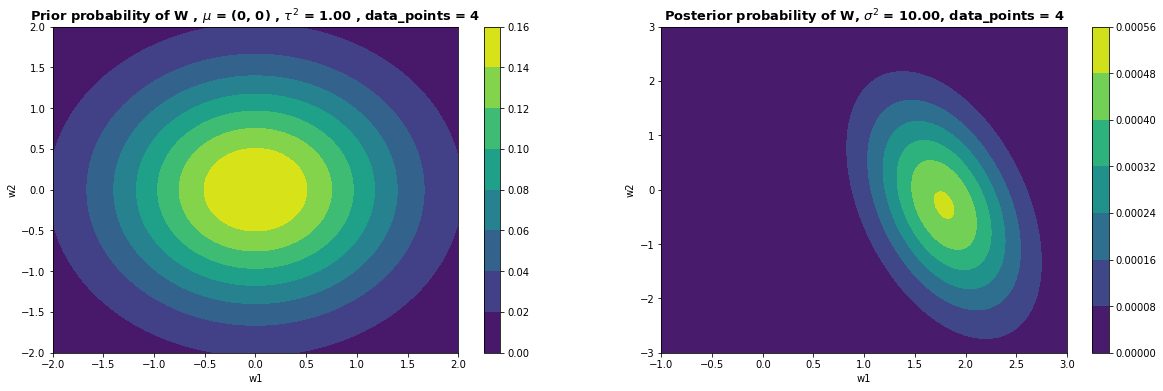

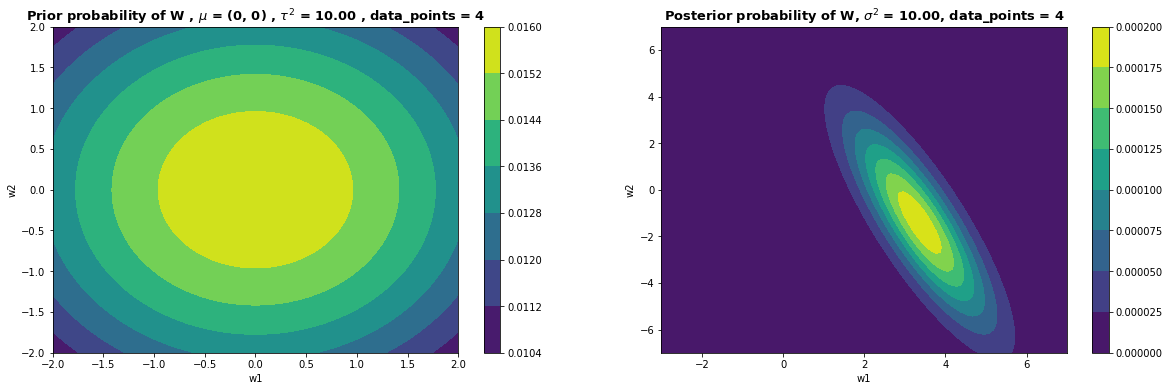

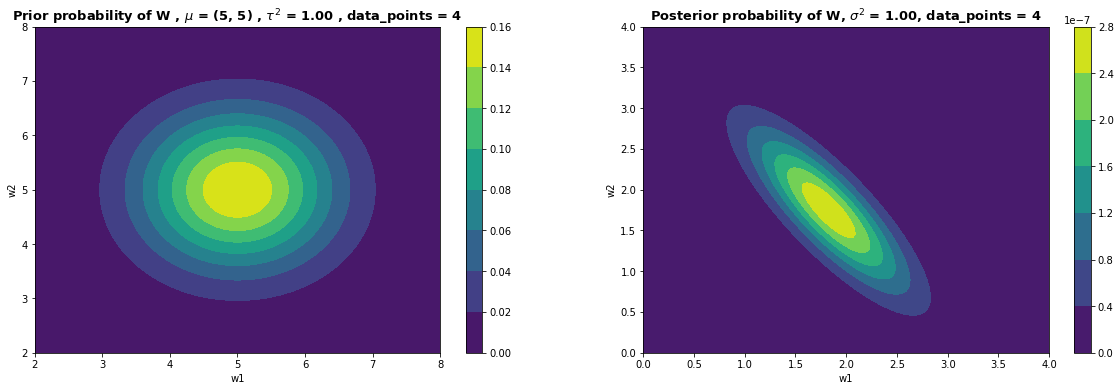

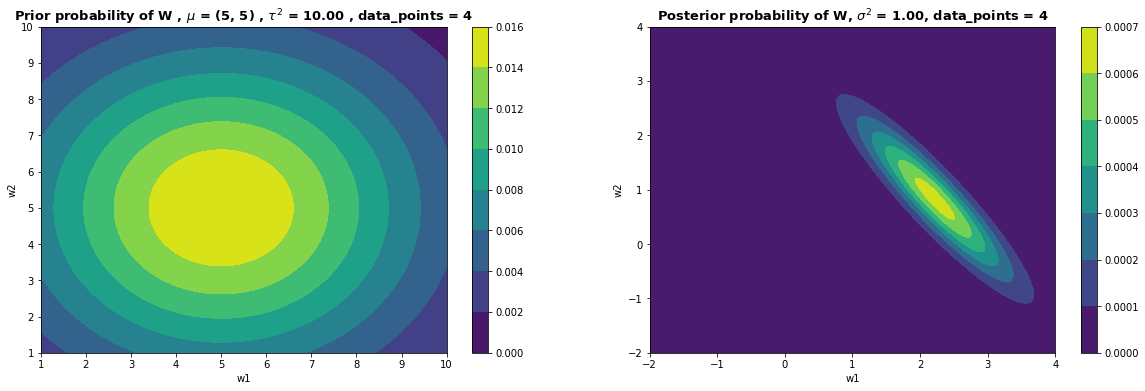

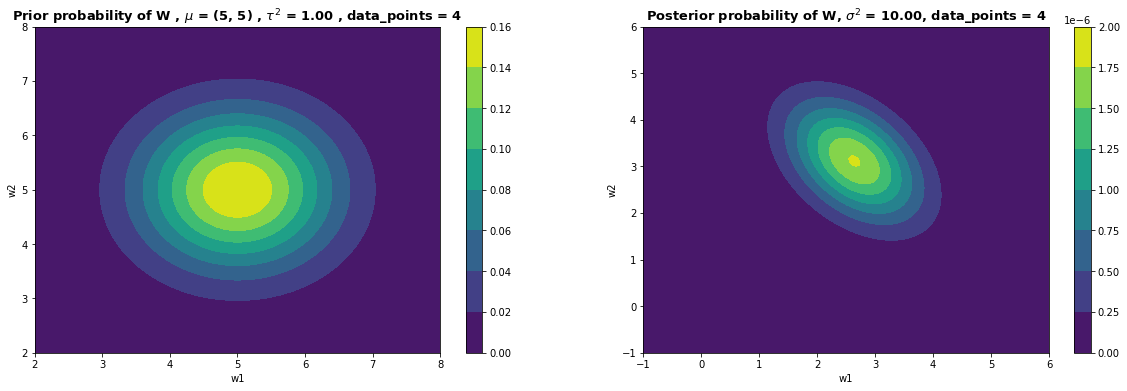

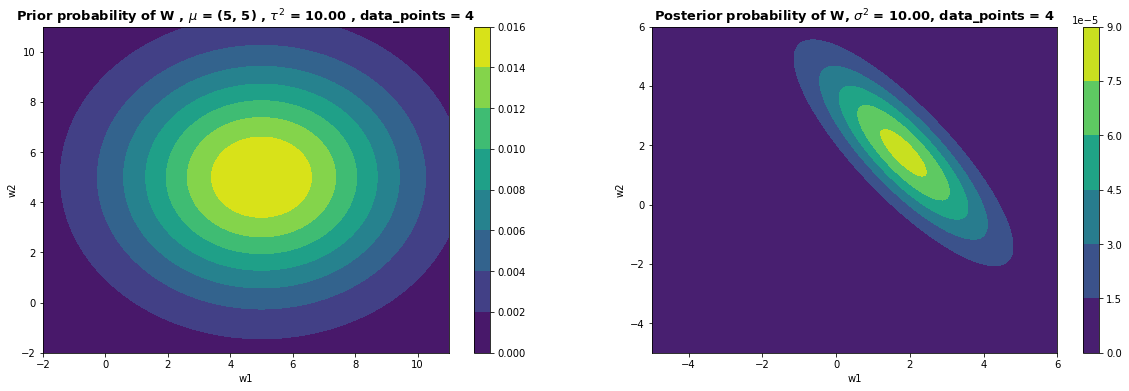

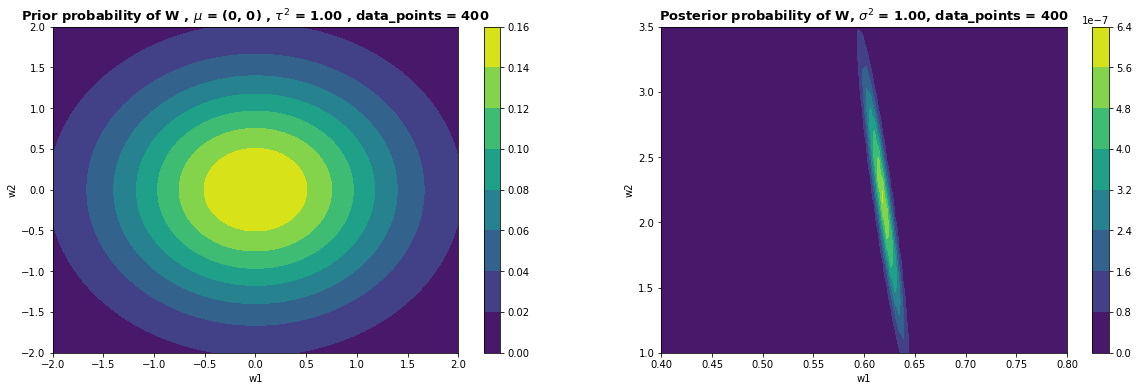

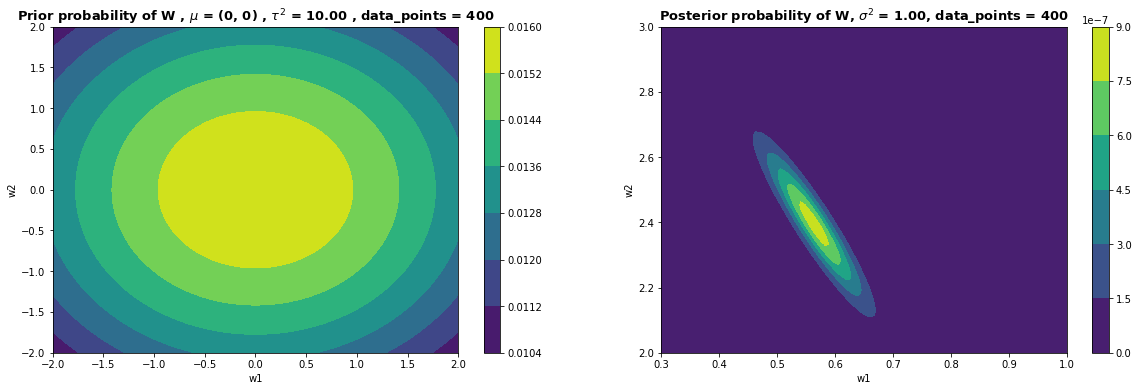

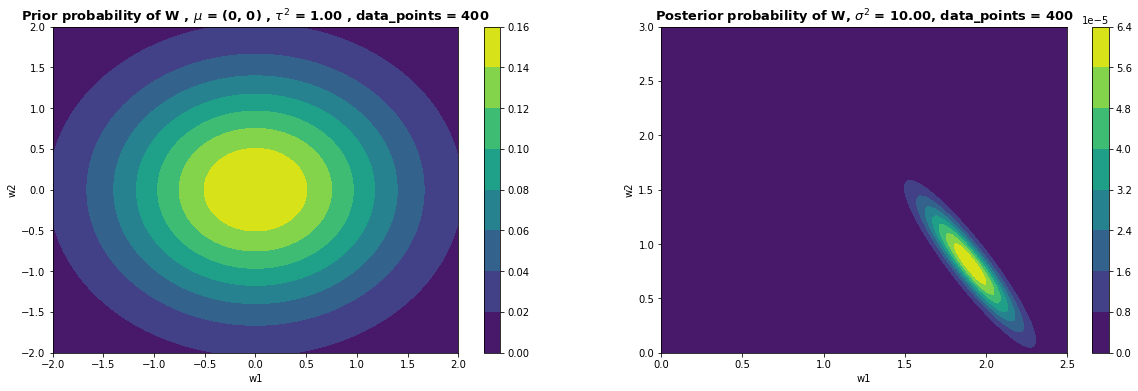

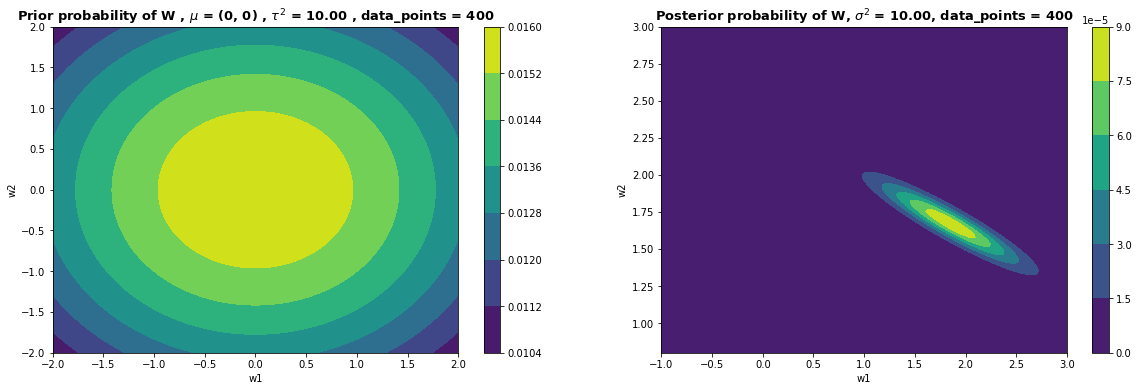

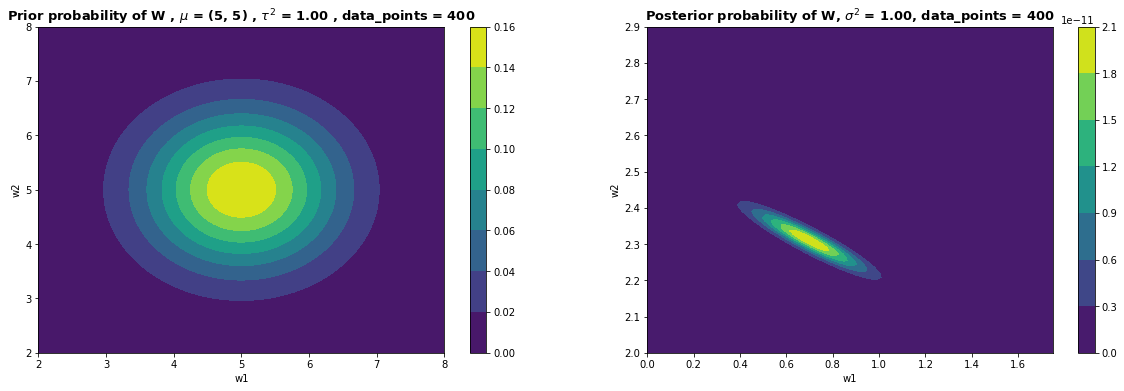

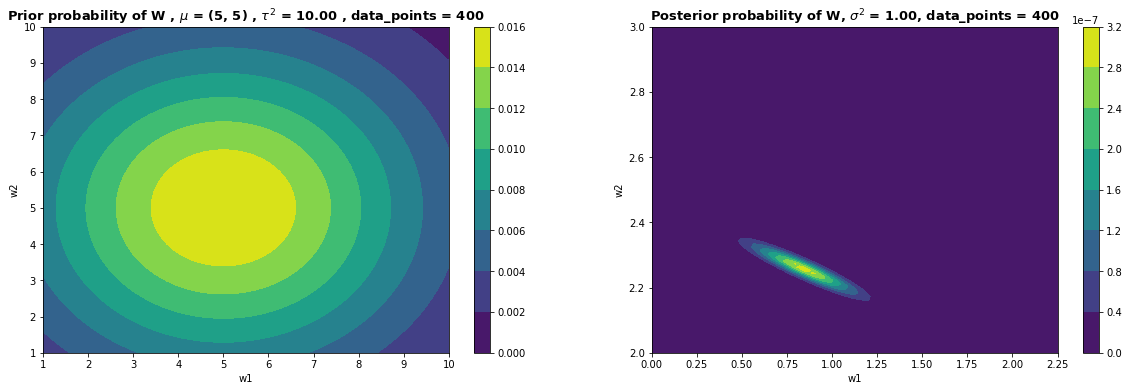

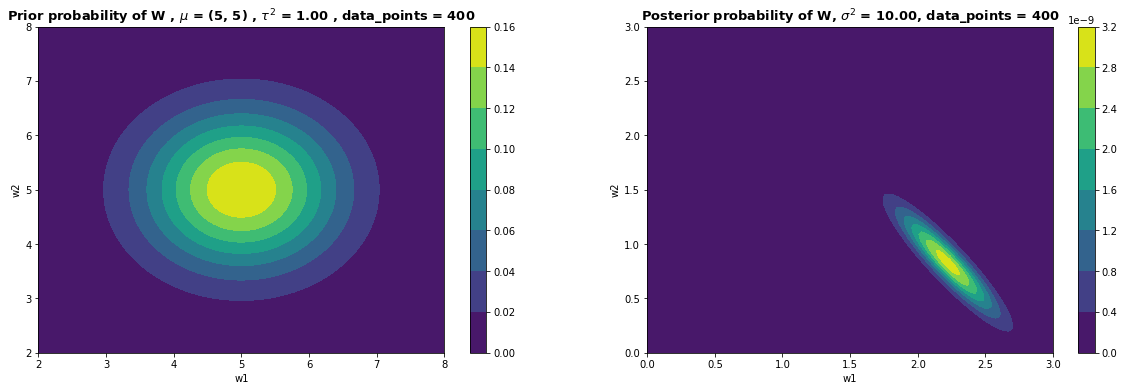

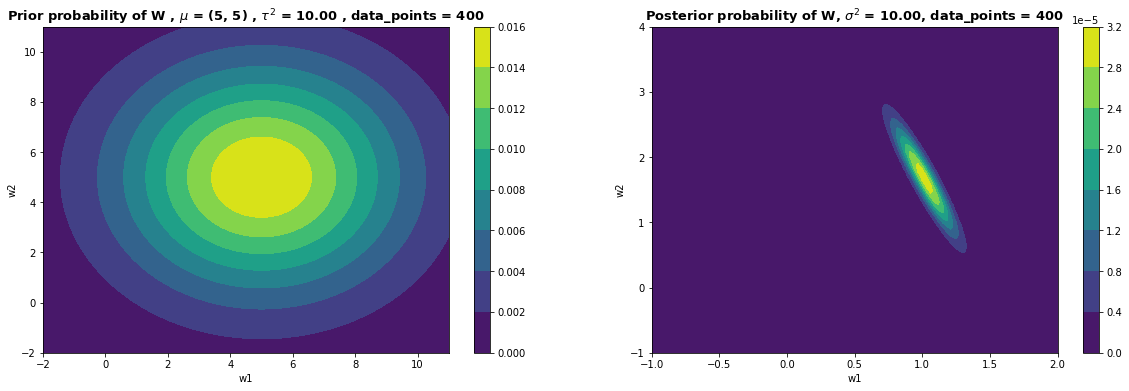

In [6]:
# Cell type : CodeWrite
def get_prior(w1, w2, mu1, mu2, tau):
    normalization = (2*np.pi*(tau**2))
    probability = np.exp(-( (mu1 - w1)**2 + (mu2 - w2)**2 )/(2*(tau**2)))
    return probability/normalization

def get_posterior(W, mu, X, Y, sigma, tau):

    """
    X - no of data points (n, d) ; here d = 2
    Y - corresponding Y values for those data points ; (n, 1)
    W - no of different sets of weights we need to calculate the posterior (1 x d) ;  d = 2 here
    sigma and tau -> Standard deviations
    """
    X_dot_W = X@(W.T)
    # print(X_dot_W)
    n = len(X); d = (len(X[0]))
    prior = get_prior(W[0], W[1], mu[0], mu[1], tau)
    Normalization = (2*np.pi*(sigma**2))**(n)
    P_W_given_X = np.exp( -0.5*np.sum( ((X_dot_W - Y)**2)/(sigma**2) ) ) / Normalization
    # print((X_dot_W - Y).shape, X_dot_W.shape)
    posterior = P_W_given_X * prior

    return (posterior, prior)

def plot_contour_posterior_prior(mu, sigma, tau, posterior_range, prior_range, factor = 1):

    """
    factor = (no of times to take the sample) (100 for some cases)
    posterior range and prior range = To plot them 
    """
    tau = tau**0.5; sigma = sigma**0.5
    X_train = np.array([ [(1.0, 2.0) , (2.0, 2.1) , (0.6, 1.5) , (1.1, 0.9)]*(factor) ])
    Y_train = np.array([[5.1, 6.1, 4.2, 2.9]*(factor)])

    # getting the posterior range
    posterior_range_X, posterior_range_Y = posterior_range[0], posterior_range[1]
    prior_range_X, prior_range_Y = prior_range[0], prior_range[1]

    # getting prior range
    posterior_w = np.zeros((len(posterior_range_X), len(posterior_range_Y)))
    prior_w = np.zeros((len(prior_range_X), len(prior_range_Y)))

    for i,x1 in enumerate(posterior_range_X):
        for j,x2 in enumerate(posterior_range_Y):
            posterior_w[i][j], _ = get_posterior(np.array([x1,x2]), mu, X_train, Y_train, sigma, tau)
            # if x1 == 1 : print(posterior_w[i][j], x1, x2)

    for i,x1 in enumerate(prior_range_X):
        for j,x2 in enumerate(prior_range_Y):
            prior_w[i][j]  = get_prior( w1 = x1, w2 = x2, mu1 = mu[0], mu2 = mu[1], tau = tau)

    # print( np.argmax(posterior_w), np.max(posterior_w))

    x_grid_posterior, y_grid_posterior = np.meshgrid(posterior_range_X, posterior_range_Y)
    x_grid_prior, y_grid_prior = np.meshgrid(prior_range_X, prior_range_Y)

    plt.figure(figsize= (20, 6))

    plt.subplot(1,2,1)
    plt.title(f"Prior probability of W , $\mu$ = {mu[0] , mu[1]} , $\\tau^2$ = {tau**2:.2f} , data_points = {factor*4}", fontweight = "bold", fontsize = 13)
    plt.contourf(x_grid_prior, y_grid_prior, prior_w)
    plt.colorbar()
    plt.xlabel("w1"); plt.ylabel("w2")

    plt.subplot(1,2,2)
    plt.title(f"Posterior probability of W, $\sigma^2$ = {sigma**2:.2f}, data_points = {factor*4}", fontweight = "bold", fontsize = 13)
    plt.contourf( x_grid_posterior, y_grid_posterior, posterior_w)
    plt.colorbar()
    plt.xlabel("w1"); plt.ylabel("w2")

mean_array = np.array([[0,0], [0,0], [0,0], [0,0], [5,5], [5,5], [5,5], [5,5] ])
sigma_array = np.array([1,1,10,10,1,1,10,10])
tau_array = np.array([1,10,1,10,1,10,1,10])

graph_limits_1 = np.array([[-1,3,-3,3,-2,2,-2,2],
                         [-3,7,-7,7,-2,2,-2,2],
                         [-1,3,-3,3,-2,2,-2,2],
                         [-3,7,-7,7,-2,2,-2,2],
                         [-0,4,-0,4,2,8,2,8],
                         [-2,4,-2,4,1,10,1,10],
                         [-1,6,-1,6,2,8,2,8],
                         [-5,6,-5,6,-2,11,-2,11]
                        ])

graph_limits_400 = np.array([[0.4,0.8,1,3.5,-2,2,-2,2],
                         [0.3, 1.0, 2, 3, -2, 2, -2, 2],
                         [-0, 2.5, -0, 3, -2, 2, -2, 2],
                         [-1, 3, 0.8, 3,-2,2,-2,2],
                         [0, 1.75, 2, 2.9 ,2,8,2,8],
                         [0.0, 2.25, 2, 3, 1,10,1,10],
                         [0, 3, 0, 3 ,2,8,2,8],
                         [-1, 2, -1, 4,-2,11,-2,11]
                        ])

for mu,sigma,tau,g in zip(mean_array, sigma_array, tau_array,graph_limits_1):
    plot_contour_posterior_prior(mu, sigma, tau, [np.linspace(g[0],g[1],100),np.linspace(g[2],g[3],100)], [np.linspace(g[4],g[5],100),np.linspace(g[6],g[7],100)], 1)

for mu,sigma,tau,g in zip(mean_array, sigma_array, tau_array,graph_limits_400):
    plot_contour_posterior_prior(mu, sigma, tau, [np.linspace(g[0],g[1],100),np.linspace(g[2],g[3],100)], [np.linspace(g[4],g[5],100),np.linspace(g[6],g[7],100)], 100)

**Cell type : TextWrite**

- Increase in data points, has no effect on prior ( ***As prior depends only on $\mu_1$ and $\mu_2$ and $\tau^2$*** ), But for posterior it has great effect. The contour size decrease ( after little distance from center, the contour decays very quickly)

- Increase in $\tau^2$ , increases the spread of the prior. Higher the value of $\tau^2$, higher the variance of prior ; so more spread 

- Increase in $\sigma^2$ , increases the spread of the posterior. Higher the value of $\sigma^2$, higher the variance and more spread 

**Cell type : TextRead**

# 5. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [108]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

def linear_kernel(u,v,degree): return (u@v.T + 1)**degree

def rbf_kernel(u, v, gamma): 
    value = np.array([np.sum((u-x)**2, axis = 1) for x in v]).T
    return np.exp(-gamma*value)

def sigmoid(u): 
    u = np.where(u>-100, u , -100)
    return ( 1/(1+np.exp(-u))  )

def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0., 
                                   kernel_param=1., num_iter_gd=100):
    # """
    # Arguments:
    # X : (n,d) shape numpy array
    # Y : (n,)  shape numpy array
    # X_test : (m,d) shape numpy array
    # kernel = 'linear' or 'rbf' or 'poly' 
    # reg_param = $\lambda$
    # num_iter_gd = number of GD iterations.

    # Returns the result of kernel logistic regression :
    # alpha: Vector of solutions for the dual. Numpy array of shape (n,)

    # Primal problem:
    # # $ \min_w  \sum_{i=1}^n \log(1+\exp(-y_i* \w^\\top \phi(\x_i)))  + \\frac{\lambda}{2} ||\w||^2 $ 

    # # the dual of which is

    # # $ \min_alpha \sum_{i=1}^n \log(1+\exp(-y_i* \\alpha^\\top K_{:,i} ))  + \\frac{\lambda}{2} \\alpha^\\top K \\alpha $
    # # where $\phi$ is the feature got by the kernel.

    # # Where K is the nxn kernel matrix computed on the training data.

    # # The kernel is defined by the kernel_param:
    # # If kernel=linear: K(\u,\\v) = \u^\\top \\v  
    # # If kernel=poly:  K(\u,\\v) = (1+\u^\\top \\v)^(kernel_param)
    # # If kernel=rbf:  K(\u,\\v) = \exp(-kernel_param*||\u-\\v||^2)
    # # """
    
    if kernel == 'rbf': K = rbf_kernel(X, X, kernel_param)
    elif kernel == 'poly': K = linear_kernel(X, X, kernel_param)
    elif kernel == 'linear': K = linear_kernel(X,X,1) - 1

    # initialise alpha as zeros
    alpha = np.zeros(len(X))

    # learning rate
    eta = 1e-4

    # Now doing gradient descent on alpha
    for e in range(num_iter_gd):

        del_alpha = reg_param*alpha@K 
        # print(del_alpha)

        for i,yi in enumerate(Y):
            del_alpha += (-yi*K[:,i])*(sigmoid(-yi*alpha@K[:,i].T)) 

        alpha -= ( eta*del_alpha if sum(np.isnan(del_alpha))==0 else 0 )
    
    return alpha

def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):

    """
    Return the predictions on test_X using the learnt alphas
    """
    if kernel == 'rbf': K_test = rbf_kernel(train_X, test_X, kernel_param) ; K_train = rbf_kernel(train_X, train_X, kernel_param) 
    elif kernel == 'poly': K_test = linear_kernel(train_X, test_X, kernel_param) ; K_train = linear_kernel(train_X, train_X, kernel_param) 
    elif kernel == 'linear': K_test = linear_kernel(train_X, test_X, 1) - 1 ; K_train = linear_kernel(train_X, train_X, 1) 

    # getting the prediction
    # print(alpha.shape, K_train.shape, K_test.shape, test_X.shape)
    prediction_train = np.array([ 1 if x > 0.5 else -1 for x in  sigmoid(alpha@K_train)] ) 
    prediction_test = np.array([ 1 if x > 0.5 else -1 for x in  sigmoid(alpha@K_test)] ) 

    # print(f" Accuracy in train set is : {sum(train_Y == prediction_train)*100/len(train_Y):.2f} % ; kernel = {kernel} ; kernel_param = {kernel_param}")

    return prediction_test


kernel_a = "rbf"
kernel_param_a = 4
reg_param_a = 1e-3

alphas_a = train_pred_logistic_regression(data_arr_A[0], data_arr_A[1], kernel_a , reg_param_a, kernel_param_a, 300)
pred_test = test_pred(alphas_a, train_X = data_arr_A[0], train_Y = data_arr_A[1], test_X = data_arr_A[2], kernel = kernel_a, kernel_param = kernel_param_a )

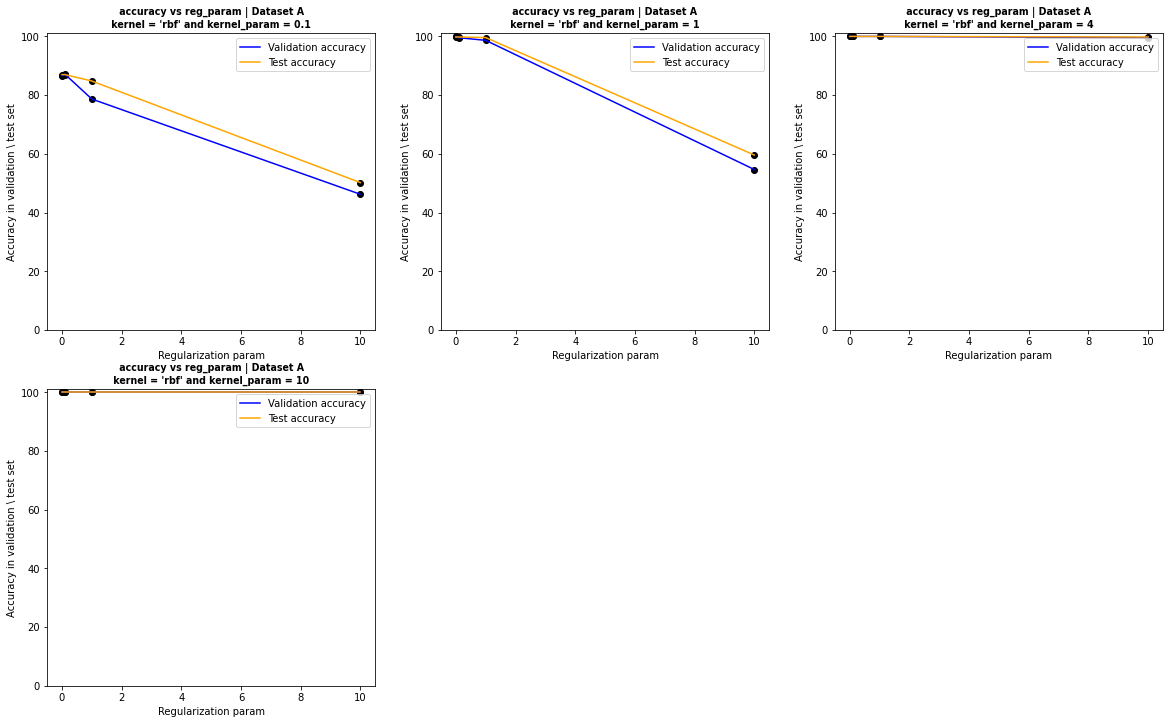

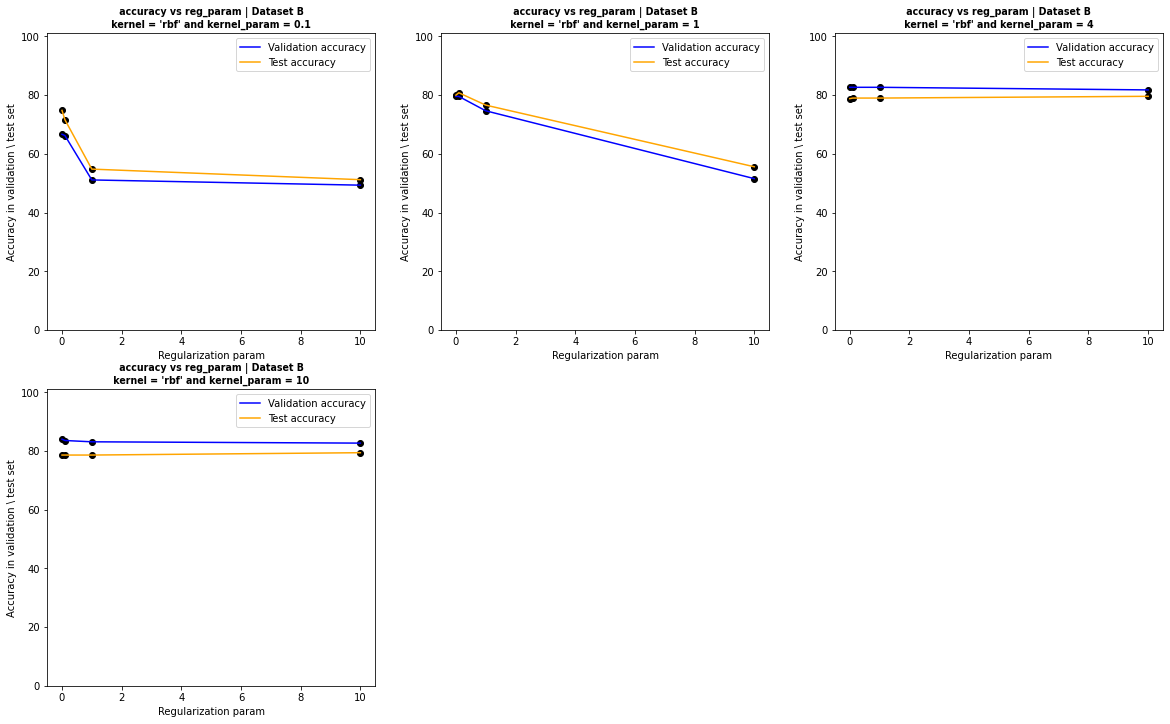

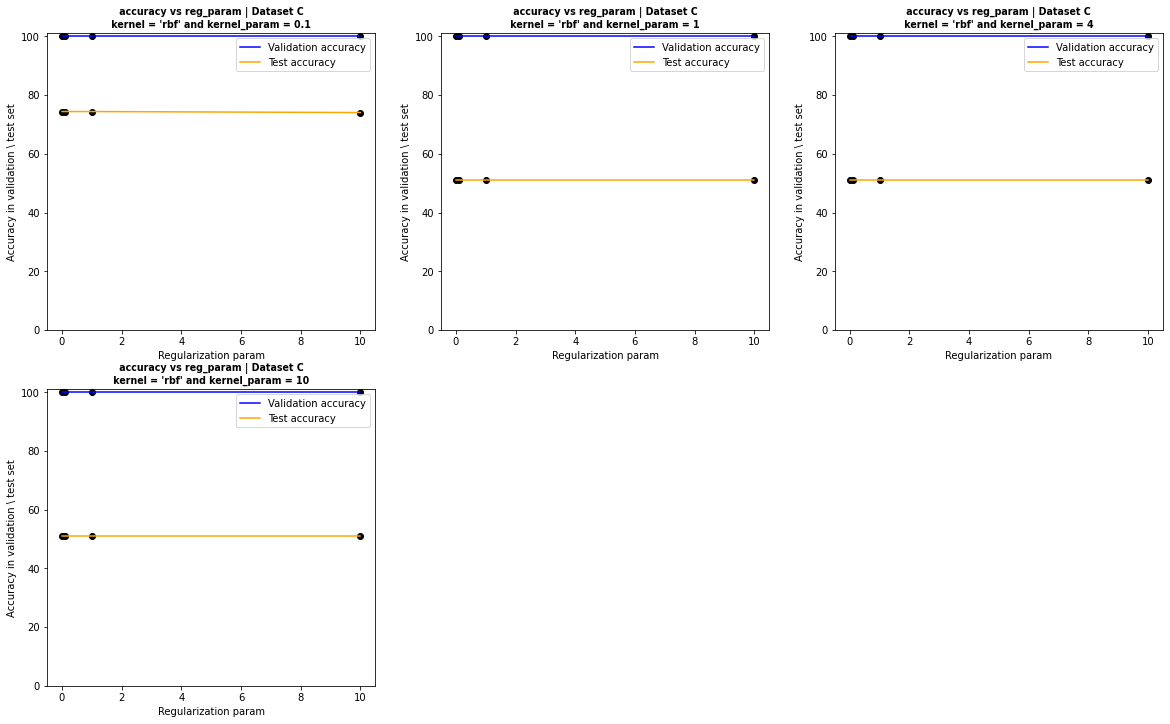

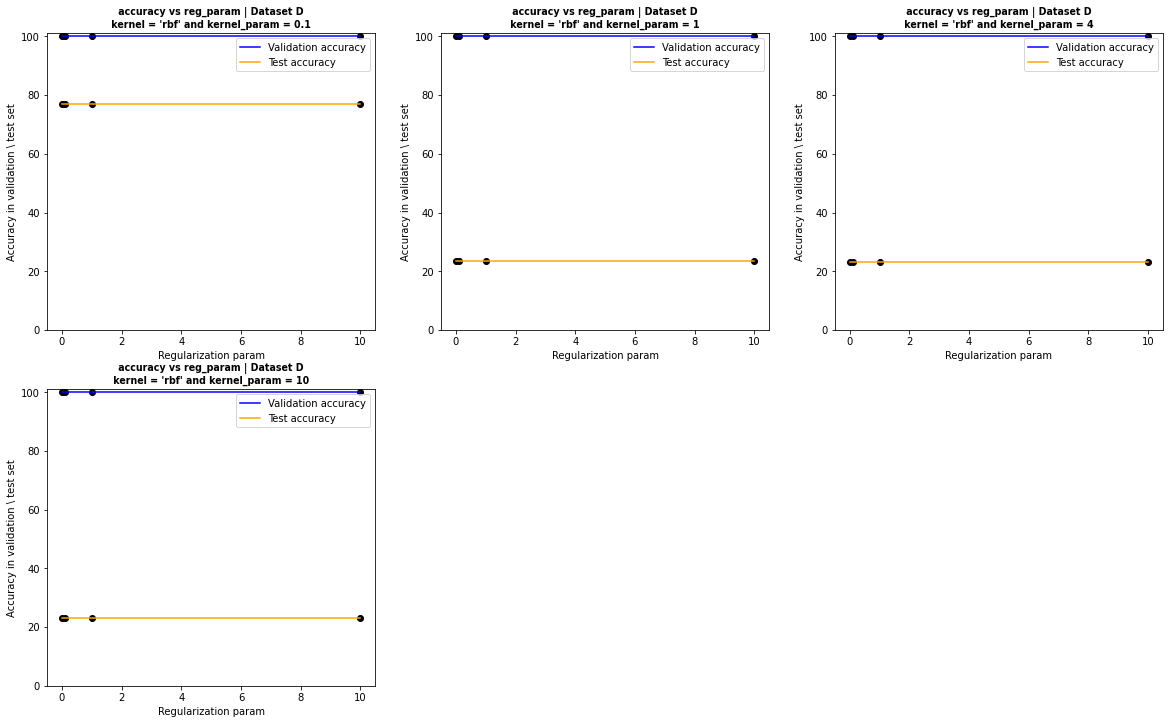

C:\Users\pcdpm\AppData\Local\Temp\ipykernel_23724\1385372121.py:58: RuntimeWarning: overflow encountered in matmul
  del_alpha = reg_param*alpha@K
C:\Users\pcdpm\AppData\Local\Temp\ipykernel_23724\1385372121.py:62: RuntimeWarning: overflow encountered in matmul
  del_alpha += (-yi*K[:,i])*(sigmoid(-yi*alpha@K[:,i].T))
C:\Users\pcdpm\AppData\Local\Temp\ipykernel_23724\1385372121.py:58: RuntimeWarning: invalid value encountered in matmul
  del_alpha = reg_param*alpha@K
C:\Users\pcdpm\AppData\Local\Temp\ipykernel_23724\1385372121.py:62: RuntimeWarning: invalid value encountered in matmul
  del_alpha += (-yi*K[:,i])*(sigmoid(-yi*alpha@K[:,i].T))
C:\Users\pcdpm\AppData\Local\Temp\ipykernel_23724\1385372121.py:79: RuntimeWarning: invalid value encountered in matmul
  prediction_train = np.array([ 1 if x > 0.5 else -1 for x in  sigmoid(alpha@K_train)] )
C:\Users\pcdpm\AppData\Local\Temp\ipykernel_23724\1385372121.py:80: RuntimeWarning: invalid value encountered in matmul
  prediction_test = n

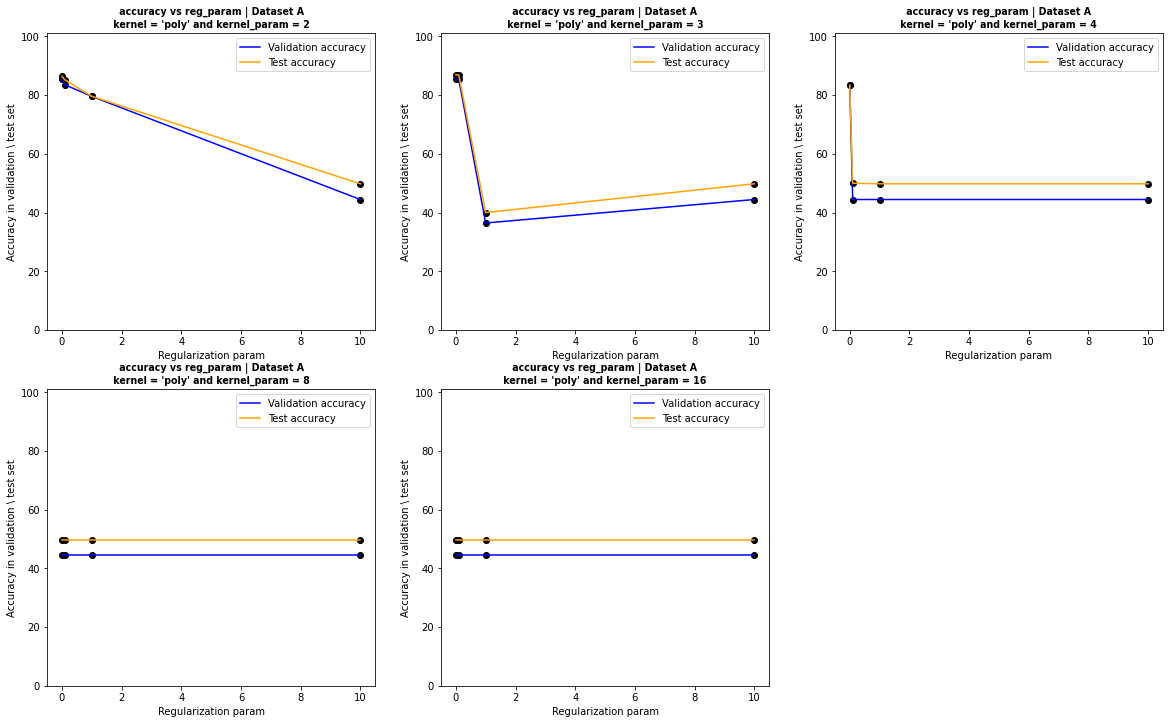

C:\Users\pcdpm\AppData\Local\Temp\ipykernel_23724\1385372121.py:79: RuntimeWarning: overflow encountered in matmul
  prediction_train = np.array([ 1 if x > 0.5 else -1 for x in  sigmoid(alpha@K_train)] )
C:\Users\pcdpm\AppData\Local\Temp\ipykernel_23724\1385372121.py:80: RuntimeWarning: overflow encountered in matmul
  prediction_test = np.array([ 1 if x > 0.5 else -1 for x in  sigmoid(alpha@K_test)] )


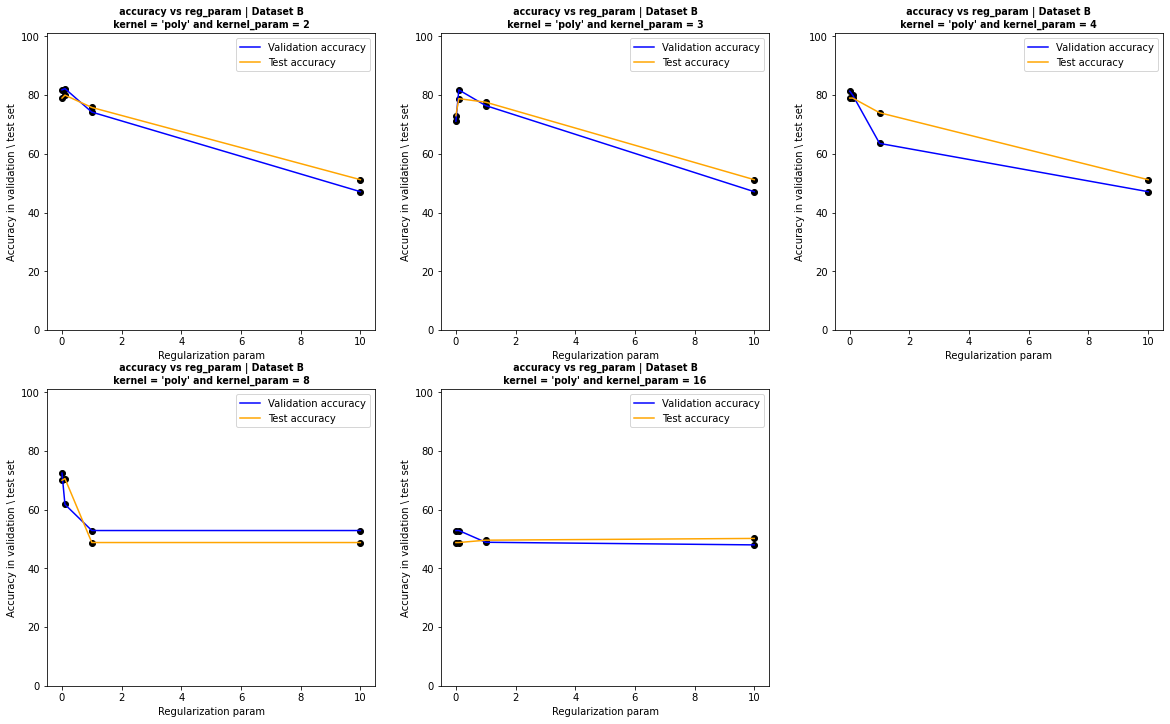

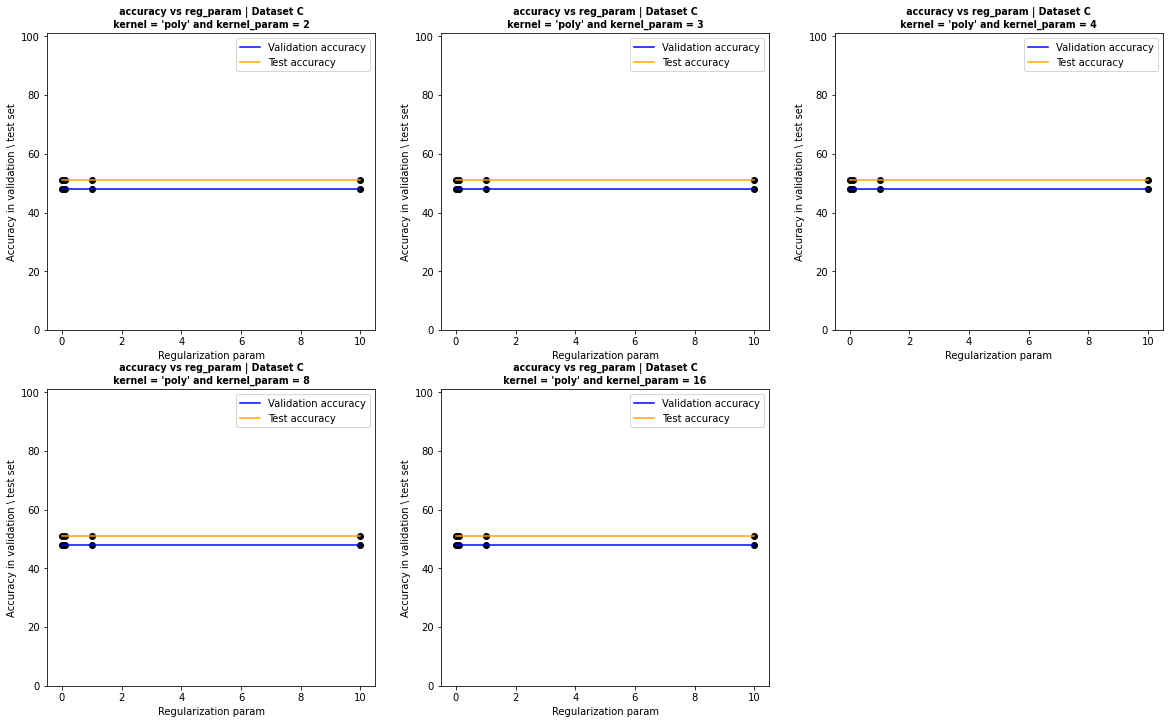

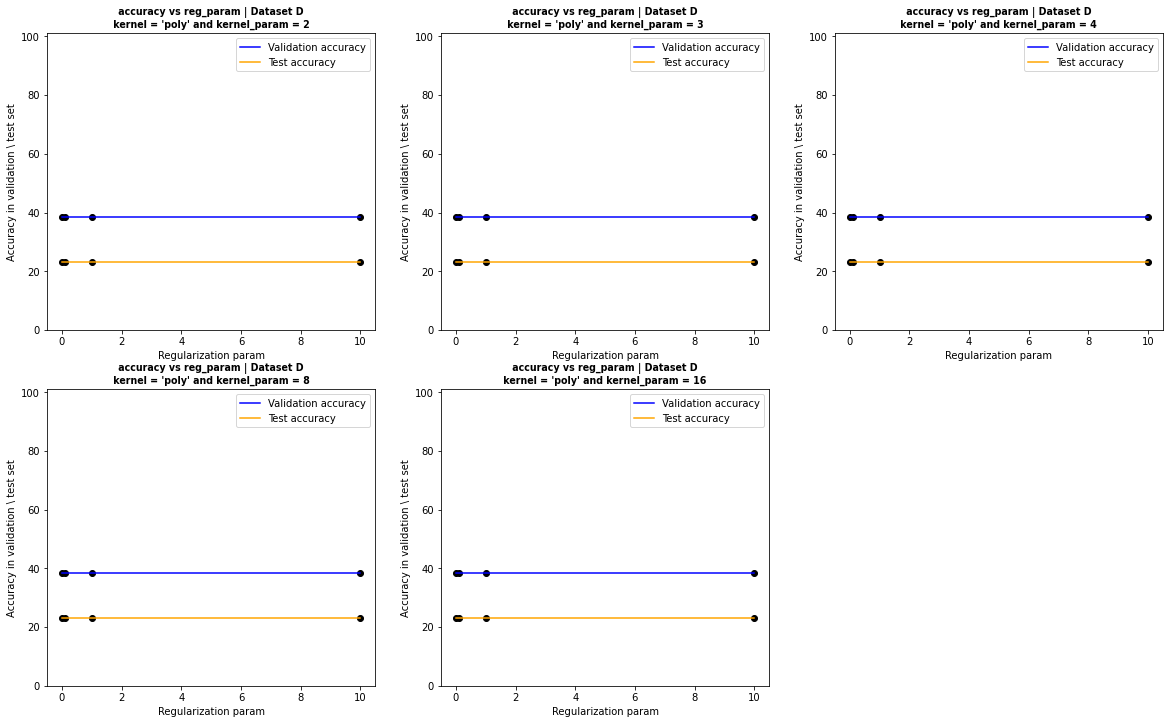

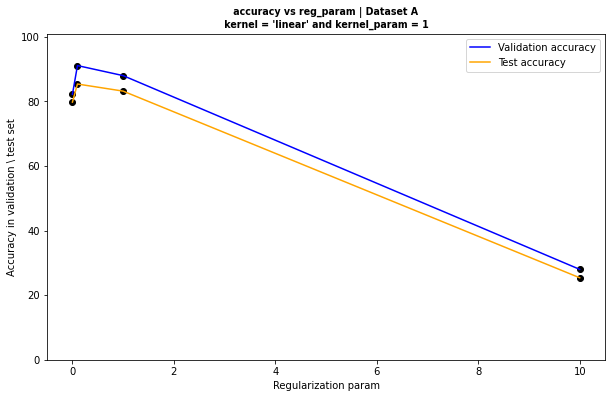

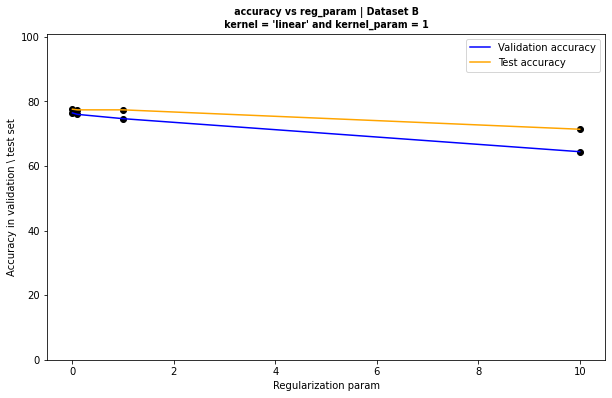

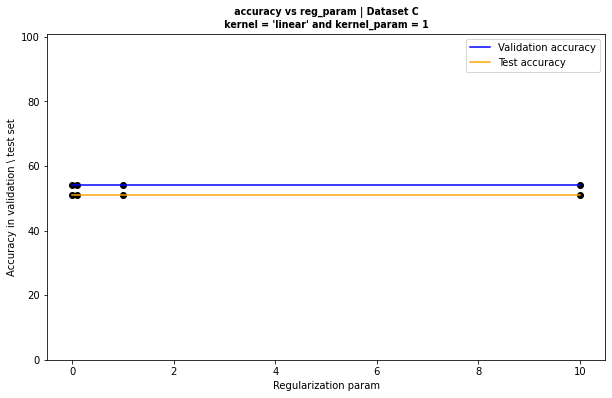

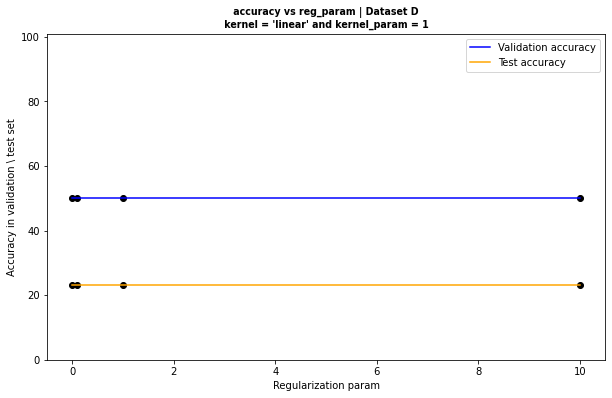

In [111]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below. 

def get_best_hyper_param( data, data_name, validation_size = 0.15,  kernel = 'rbf', kernel_params = [], regularization_params = [] ):
    
    # generate a plot for the given kernel params , with regularization_params for each kernel_params
    """ Output : plots of accuracy vs regularization_params for a given kernel params """

    cols = 3 if kernel != 'linear' else 1
    rows = int( (len(kernel_params)/3)  + 1 )
    graph_count = 1

    # creating the validation data
    train_X, train_Y, test_X, test_Y = data
    val_index = np.random.randint(0,len(train_X), int(validation_size*len(train_X)))

    val_X = train_X[ val_index ]
    val_Y = train_Y[ val_index ]

    validation_accuracy, test_accuracy = [], []
    
    # Now plotting for each hyper parameter
    if kernel != "linear" : plt.figure(figsize = (20,12))
    else: plt.figure(figsize = (10,6))

    for i in (range(len(kernel_params))):

        plt.subplot(rows, cols, graph_count)
        plt.title(f" accuracy vs reg_param | {data_name} \n kernel = '{kernel}' and kernel_param = {kernel_params[i]} ", fontweight = 'bold', size = 9.5)
        plt.xlabel(f"Regularization param")
        plt.ylabel(f"Accuracy in validation \ test set")

        # fixing one kernel parameter
        k_parameter = kernel_params[i]
        
        accuracy_val, accuracy_test = [], []

        # getting all the accuracy for different regularization parameter
        for r_parameter in regularization_params:

            alphas = train_pred_logistic_regression(train_X, train_Y, kernel = kernel , reg_param = r_parameter, kernel_param = k_parameter, num_iter_gd = 300)
            pred_test = test_pred(alphas, train_X = train_X, train_Y = train_Y, test_X = test_X, kernel = kernel, kernel_param = k_parameter )
            pred_val = test_pred(alphas, train_X = train_X, train_Y = train_Y, test_X = val_X, kernel = kernel, kernel_param = k_parameter )
            
            # appending the accuracy
            accuracy_test.append(sum(pred_test == test_Y)*100/len(test_Y))
            accuracy_val.append(sum(pred_val == val_Y)*100/len(val_Y))

        plt.scatter(regularization_params, accuracy_val, color = 'black' )
        plt.plot(regularization_params, accuracy_val, label = "Validation accuracy", color = 'blue' )
        plt.ylim(top = 101, bottom = 0)

        plt.scatter(regularization_params, accuracy_test, color = 'black' )
        plt.plot(regularization_params, accuracy_test, label = "Test accuracy", color = 'orange' )
        plt.ylim(top = 101, bottom = 0)

        plt.legend(loc = 'best')

        validation_accuracy.append(accuracy_val); test_accuracy.append(accuracy_test)
        graph_count += 1
    
    plt.show()
    # return validation_accuracy, test_accuracy

get_best_hyper_param( data_arr_A, "Dataset A", validation_size = 0.15,  kernel = 'rbf', kernel_params = [0.1, 1 , 4, 10], regularization_params = [1e-3, 1e-1, 1, 10] )
get_best_hyper_param( data_arr_B, "Dataset B", validation_size = 0.15,  kernel = 'rbf', kernel_params = [0.1, 1 , 4, 10], regularization_params = [1e-3, 1e-1, 1, 10] )
get_best_hyper_param( data_arr_C, "Dataset C", validation_size = 0.15,  kernel = 'rbf', kernel_params = [0.1, 1 , 4, 10], regularization_params = [1e-3, 1e-1, 1, 10] )
get_best_hyper_param( data_arr_D, "Dataset D", validation_size = 0.15,  kernel = 'rbf', kernel_params = [0.1, 1 , 4, 10], regularization_params = [1e-3, 1e-1, 1, 10] )

get_best_hyper_param( data_arr_A, "Dataset A", validation_size = 0.15,  kernel = 'poly', kernel_params = [2, 3 , 4, 8, 16], regularization_params = [1e-3, 1e-1, 1, 10] )
get_best_hyper_param( data_arr_B, "Dataset B", validation_size = 0.15,  kernel = 'poly', kernel_params = [2, 3 , 4, 8, 16], regularization_params = [1e-3, 1e-1, 1, 10] )
get_best_hyper_param( data_arr_C, "Dataset C", validation_size = 0.15,  kernel = 'poly', kernel_params = [2, 3 , 4, 8, 16], regularization_params = [1e-3, 1e-1, 1, 10] )
get_best_hyper_param( data_arr_D, "Dataset D", validation_size = 0.15,  kernel = 'poly', kernel_params = [2, 3 , 4, 8, 16], regularization_params = [1e-3, 1e-1, 1, 10] )

get_best_hyper_param( data_arr_A, "Dataset A", validation_size = 0.15,  kernel = 'linear', kernel_params = [1], regularization_params = [1e-3, 1e-1, 1, 10] )
get_best_hyper_param( data_arr_B, "Dataset B", validation_size = 0.15,  kernel = 'linear', kernel_params = [1], regularization_params = [1e-3, 1e-1, 1, 10] )
get_best_hyper_param( data_arr_C, "Dataset C", validation_size = 0.15,  kernel = 'linear', kernel_params = [1], regularization_params = [1e-3, 1e-1, 1, 10] )
get_best_hyper_param( data_arr_D, "Dataset D", validation_size = 0.15,  kernel = 'linear', kernel_params = [1], regularization_params = [1e-3, 1e-1, 1, 10] )

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

- <u>***Observations***</u>:

-  After experimenting, the best learning rate is found to 1e-4 with 300 iteration ; Which gives good results in most of the cases than other learning rates and iterations

- Among all kernels, "rbf" kernel performs better than others in all datasets, which is due to its unique advantage to viewing data in very higher dimensions than other kernels

- Linear and Polynomial kernel performs not as good as rbf kernel.

- Polynomial kernel gives ***overflow-errors*** and ***nan-value ,  infinite-value*** errors for higher degree kernels. This is due to higher power in higher degree values, which eventually becomes so large.

- Linear kernel performs worser than polynomial kernel and this is expected as polynomial kernel with higher degree can generalize more and itself have linear terms

<u>**`Best Hyper-parameter for each dataset`**</u>

| Dataset / hyper-params | kernel | kernel-param | regularization-param | test-error | train-error
| --- | --- | --- | --- | --- | --- |
|**Dataset_A**|rbf|4|1e-3|0.000| 0.000 |
|**Dataset_A**|polynomial|3|1e-1|0.101| 0.090 |
|**Dataset_A**|linear|1|1e-3|0.166| 0.182 |
|**Dataset_B**|rbf|1|1|0.185| 0.230 |
|**Dataset_B**|polynomial|2|1e-3|0.192| 0.220 |
|**Dataset_B**|linear|1|1e-1|0.224| 0.239 |
|**Dataset_C**|rbf|0.1|1e-1|0.245| 0.000 |
|**Dataset_C**|polynomial|4|1e-3|0.515| 0.485 |
|**Dataset_C**|linear|1|1e-1|0.495| 0.485 |
|**Dataset_D**|rbf|0.1|1|0.240| 0.000 |
|**Dataset_D**|polynomial|3|1e-1|0.762| 0.620 |
|**Dataset_D**|linear|1|1e-3|0.775| 0.475 |

- For Dataset C and D, 'rbf' kernel overfits the Train data and the test-error is high for that

- Other kernels, performs even worser than Rbf kernel in Dataset C and D, as they couldn't able to generalize well in those datasets

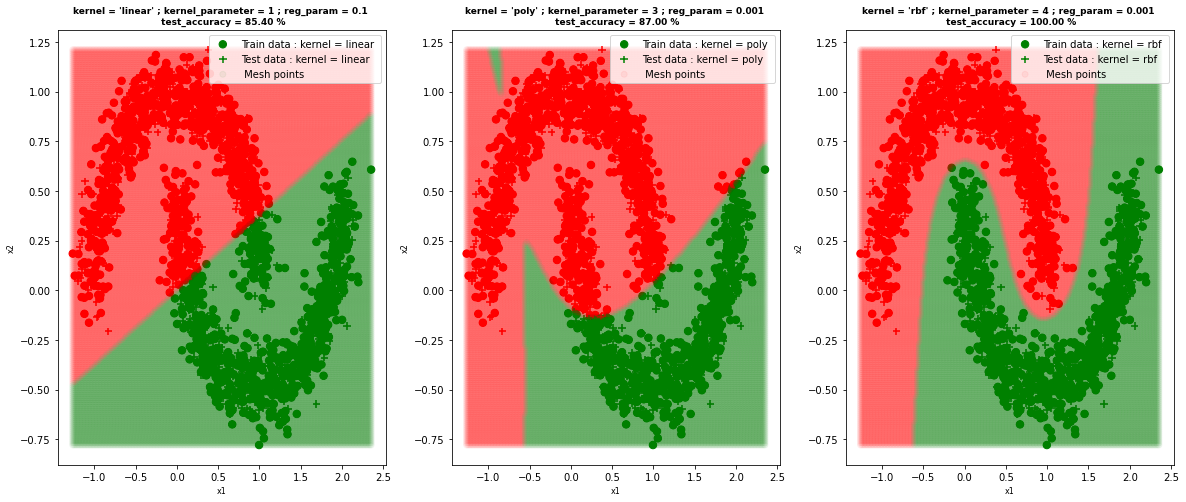

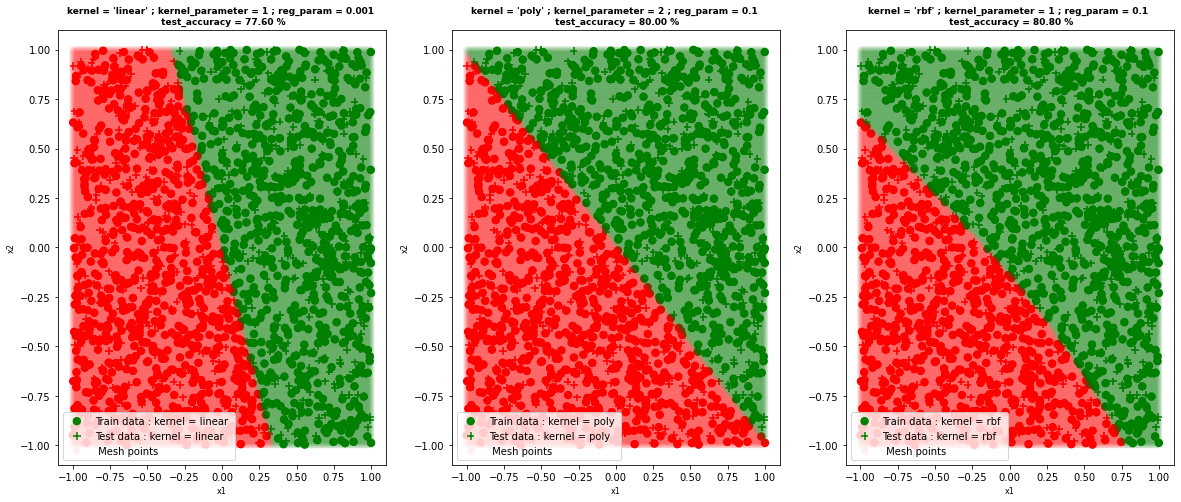

In [44]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and dataset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

def plot_learned_classifier(data, kernel = [], kernel_parameters = [], reg_params = []):

    """ Input : give 3 kernels and their corresponding kernel parameter """
    """ Output: Plots will be generated for given data """

    train_X, train_Y, test_X, test_Y = data

    # -1 = red, 1 = green
    colors = np.array(['green','green','red'])

    plt.figure(figsize = (20,8))
    
    for i, (k, k_param, r_param) in enumerate(zip(kernel, kernel_parameters, reg_params)):

        plt.subplot(1,3,i+1)
        
        # getting the alphas
        alphas = train_pred_logistic_regression(train_X, train_Y, kernel = k , reg_param = r_param, kernel_param = k_param, num_iter_gd = 300)
        pred_test = test_pred(alphas, train_X = train_X, train_Y = train_Y, test_X = test_X, kernel = k, kernel_param = k_param )
        pred_train = test_pred(alphas, train_X = train_X, train_Y = train_Y, test_X = train_X, kernel = k, kernel_param = k_param )

        test_accuracy = (sum(pred_test == test_Y)*100)/len(test_Y)

        plt.scatter(train_X[:,0], train_X[:,1], marker = "o", c = colors[pred_train], s = 55, label = f"Train data : kernel = {k} ")
        plt.scatter(test_X[:,0], test_X[:,1], marker = "+", c = colors[pred_test], s = 55, label = f"Test data : kernel = {k}")

        # plotting the learned classifiers
        full_X1 = np.linspace( min( min(train_X[:,0]), min(test_X[:,0]) ) , max( max(train_X[:,0]), max(test_X[:,0]) ), 200 )
        full_X2 = np.linspace( min( min(train_X[:,1]), min(test_X[:,1]) ) , max( max(train_X[:,1]), max(test_X[:,1]) ), 200 )
        
        # creating mesh
        mesh_x1, mesh_x2 = np.meshgrid(full_X1, full_X2)
        mesh_x1 = mesh_x1.reshape(-1,1); mesh_x2 = mesh_x2.reshape(-1,1)

        # creating mesh points and its corresponding value
        mesh_points = np.hstack((mesh_x1,mesh_x2))
        mesh_pred = test_pred(alphas, train_X = train_X, train_Y = train_Y, test_X = mesh_points, kernel = k, kernel_param = k_param).astype(np.int32)
        plt.scatter(mesh_points[:,0], mesh_points[:,1], c = colors[mesh_pred], label = f" Mesh points ", alpha = 0.05)

        plt.title(f"kernel = '{k}' ; kernel_parameter = {k_param} ; reg_param = {r_param} \n test_accuracy = {test_accuracy:.2f} %", fontweight = 'bold', size = 9)
        plt.xlabel("x1", size = 8); plt.ylabel("x2", size = 8)
        plt.legend(loc = 'best')
    
    plt.show()

plot_learned_classifier(data_arr_A, kernel = ['linear','poly','rbf'], kernel_parameters = [1, 3, 4], reg_params = [1e-1, 1e-3, 1e-3])
plot_learned_classifier(data_arr_B, kernel = ['linear','poly','rbf'], kernel_parameters = [1, 2, 1], reg_params = [1e-3, 1e-1, 1e-1])

**Cell type : TextRead**

# 6. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [106]:
# CodeWrite cell
# Write Decision tree classifier from scratch, 
# write only functions here (you may write extra functions here if you wish)

def calc_accuracy_error(n_right, n_left):

    nl = sum(n_left)
    nr = sum(n_right)

    acc_l = max(n_left)/(nl) if nl > 0 else 1
    acc_r = max(n_right)/(nr) if nr > 0 else 1

    return  round( nl*(1 - (acc_l) )/(nl+nr) + nr*(1 - (acc_r) )/(nr+nl) , 8 )
    # return (1 - (nl*acc_l)/(nl+nr) ) + (1 - (nr*acc_r)/(nr+nl) )

def calc_entropy_error(n_right, n_left):

    nl = sum(n_left)
    nr = sum(n_right)
    N = nl + nr

    # calculating the probabilities
    p_right, p_left = [0 for x in range(len(n_right))], [0 for x in range(len(n_left))]

    if nl > 0: p_left = [x/nl for x in n_left]
    if nr > 0: p_right = [x/nr for x in n_right]

    # entropy calculation
    entropy_l = sum([-x*np.log(x) if x > 0 else 0 for x in p_left ]+[0])*(nl/N) 
    entropy_r = sum([-x*np.log(x) if x > 0 else 0 for x in p_right ]+[0])*(nr/N)

    return entropy_l + entropy_r 

def make_split(index, threshold, data):

    # Given a Threshold and a index it will split the data there 
    # Data is a (n,d) matrix ;  where n -> data points and d is the dimension
    v1 = data[data[:,index] > threshold]
    v2 = data[data[:,index] <= threshold]

    return (v1, v2)

def find_split_at_dim_d(data, y_data, dim, criteria = 'accuracy'):

    # gives the best split at a particular dimension
    # data = (n,d) matrix
    
    n = len(data)
    d = len(data[0])

    # getting values only along the required dimension
    x_data_along_dim = data[:, dim]
    unique_classes = sorted(list(set(y_data)))
    n_class = len(unique_classes)
    class_to_ind = {x:i for i,x in enumerate(unique_classes)}

    # can be used to store the number of class points in the right and left
    n_class_points_right = [0 for i in range(n_class)]
    n_class_points_left = [0 for i in range(n_class)]

    # now just updating the right as of now everything is in right
    for c in y_data: n_class_points_right[class_to_ind[c]] += 1
    
    # for iterating through the data points
    train_data = [(x,y) for x,y in zip(x_data_along_dim, y_data)]
    train_data.sort()
    
    # to store error and thresholds and split_width at each position
    errors, thresholds = [], []
    split_width = []

    # going through 
    for ind,(x_val, y_val) in enumerate(train_data):

        n_class_points_right[ class_to_ind[y_val] ] -= 1
        n_class_points_left[ class_to_ind[y_val] ] += 1

        # collecting all data points below a particular value
        if ind == n-1 or x_val != train_data[ind+1][0]:

            if criteria == "accuracy": 
                e = calc_accuracy_error(n_class_points_right, n_class_points_left)
                errors.append(e)
                thresholds.append(x_val)
            
            elif criteria == "entropy":
                e = calc_entropy_error(n_class_points_right, n_class_points_left)
                errors.append(e)
                thresholds.append(x_val)
            
            # at maximum split width both class should have equal size
            split_width.append( min(sum(n_class_points_right), sum(n_class_points_left)) )

    errors = np.array(errors) ; thresholds = np.array(thresholds)
    
    # If multiple minimum errors are there, then choosing the widest split
    min_error_ind = np.argmin(errors)
    min_error = errors[min_error_ind]; minimum_errors = []

    for i,v in enumerate(errors):
        if min_error == v: minimum_errors.append(i)

    # for multiple minima , so take the middle threshold for better split
    min_error_ind = minimum_errors[len(minimum_errors)//2]

    return (errors[min_error_ind], thresholds[min_error_ind], split_width[min_error_ind])            
    

def best_split(data, y_data, criteria = 'accuracy' ):

    # Returns the best split among the all dimensions
    # data should be (n,d) matrix
    n,d = data.shape
    error_criteria = np.array([0 for i in range(d)], dtype  = np.float64) # to store the max accuracy among all dimensions
    thresholds = np.array([0 for i in range(d)], dtype  = np.float64) # to store the threshold for error_criteria among all dimensions
    split_width = np.array([0 for i in range(d)], dtype = np.float64) # to store the split width we will have at each dim for the best threshold

    for i in range(d):
        error_criteria[i], thresholds[i], split_width[i] = find_split_at_dim_d(data, y_data, dim = i, criteria = criteria)
    
    # index at which maximum criteria occurs
    min_ind = np.argmin(error_criteria)
    min_error = error_criteria[min_ind]
    
    # getting the split_width at that position
    max_split_width = split_width[min_ind]
    
    # choosing the best minima if multiple minima occurs
    for i,v in enumerate(error_criteria):
        if (v == min_error) and (max_split_width < split_width[i]): 
            
            # if better split width is there , we will take that
            max_split_width = split_width[i]; min_ind = i

    
    # returns the maximum index for which best accuracy occurs and the threshold
    return (error_criteria[min_ind], min_ind, thresholds[min_ind])

class TreeNode():

    def __init__(self, NodeClass = None, right = None, left = None, split_dim = -1, threshold = None):

        # these are all properties of TreeNode object
        self.NodeClass = NodeClass
        self.right = right # if condition is satisfied, >
        self.left = left   # if condition not satisfied, <=
        self.split_dim = split_dim # the dimension to see the split
        self.threshold = threshold # threshold for the split
    
    def split(self, data):

        if self.NodeClass is not None: return ( [self.NodeClass]*(len(data)), -1 )

        # data should be a (n,d) matrix , where n can be given for a vector
        indices = (data[:,self.split_dim] >= self.threshold)
        prediction = [self.right if val == True else self.left for val in indices]       

        """ Self.Right can be class or a TreeNode object itself based on wether it is root or not"""

        # 1 implies we need to travel further inside, -1 means leaf node reached
        return (prediction, 1) 

class Dtrees():

        def __init__(self, criterion = 'accuracy', num_nodes_stop = 1):
            self.criterion = criterion
            self.num_nodes_stop = num_nodes_stop
            self.learned_trees = []
        
        def eval(self, X, Y = [], notify = False):

            X_test = X
            # X should be a (n,d) matrix 
            if notify == True : print(f" Evaluation started !... ")

            pred = []

            for i,v in enumerate(X):
                
                curr_tree = self.learned_trees[0]
                
                while curr_tree.NodeClass == None:
                    res = curr_tree.split(v.reshape(1,-1))
                    # print(res)
                    curr_tree = res[0][0]
                
                pred.append(self.ind_to_class[curr_tree.NodeClass])
            
            # converting to a numpy array
            pred = np.array(pred)
            
            if len(Y) == len(X) and notify == True:
                print(f" Accuracy  :  {sum((pred == Y))*100/len(Y):.3f} \n" )
            
            # print(pred)
            return pred
            
        def train(self, X, Y, notify = False):

            self.learned_trees = []
            if notify : print(" \n Training started... ")

            self.X = X
            self.Y = Y
            self.class_to_ind = { x:i for i,x in enumerate(sorted(list(set(Y)))) }
            self.ind_to_class = {y:x for x,y in self.class_to_ind.items()}

            # print(f" class to index : {self.class_to_ind} , {Y.reshape(-1,1).shape}")

            """ using bfs to train a Decision-tree """

            X_data_to_train = [np.concatenate((X,Y.reshape(-1,1)), axis = 1)] # contains the data for the node 0
            tree_nodes = [TreeNode()] # to store the particular node of the tree
            tree_ind = 0
            maximum_depth_limit = 0; total_classified_as_pure = 0

            # raise Exception(X_data_to_train[0].shape, X.shape)

            while len(X_data_to_train) > 0 and maximum_depth_limit < 190:

                # to store the data for further nodes
                new_X_data_to_train = []

                # Iterating through all the data
                for i,v in enumerate( X_data_to_train ):

                    curr_tree_node = tree_nodes[tree_ind]
                    
                    # checking if the data is of a pure node or less than min required size
                    if len(set(v[:,-1])) == 1: 
                        curr_tree_node.NodeClass = self.class_to_ind[v[:,-1][0]]
                        # print( f" printing inside a pure node : tree-ind {tree_ind}, len {len(tree_nodes)}, node-class : {curr_tree_node.NodeClass}, elements : {len(v)}" )
                        """ testing done -> passed """
                        total_classified_as_pure += len(v)
                        # print(f"total classified as pure : {total_classified_as_pure}")
                        tree_ind += 1
                        continue

                    elif len(v) <= self.num_nodes_stop:

                        class_counts = -1 ; max_class = -1

                        for i in set(v[:,-1]):
                            if (list(v[:,-1]).count(i) >= class_counts): class_counts = list(v[:,-1]).count(i); max_class = i

                        curr_tree_node.NodeClass = self.class_to_ind[max_class]
                        total_classified_as_pure += len(v)
                        tree_ind += 1
                        # print( f" printing inside a pure node (less data points): tree-ind {tree_ind}, len {len(tree_nodes)}, node-class : {curr_tree_node.NodeClass}, elements : {len(v)}" )
                        """ Testing done -> passed """
                        continue

                    # getting the best split
                    error, min_error_ind, threshold_val = best_split( data = v[:,:-1], y_data = v[:,-1], criteria = self.criterion )

                    # Now creating a tree node for that
                    split_1, split_2 = make_split(min_error_ind, threshold_val, v)
                    curr_tree_node.right = TreeNode()
                    curr_tree_node.left = TreeNode()

                    # Now updating a the tree 
                    curr_tree_node.threshold = threshold_val
                    curr_tree_node.split_dim = min_error_ind

                    # now updating the new_X_data_to_train
                    new_X_data_to_train.append(split_1)
                    new_X_data_to_train.append(split_2)

                    # adding the tree nodes
                    tree_nodes.append(curr_tree_node.right)
                    tree_nodes.append(curr_tree_node.left)

                    # if tree_ind >= 143:
                    #     print( " tree_ind and len(tree) " ,tree_ind, len(tree_nodes) , f" split_1 and 2 len :  {len(split_1)} , {len(split_2)} ; threshold = {threshold_val} ; dim = {min_error_ind}")
                    #     # print(v.shape, set(v[:,0]), len(split_1), len(split_2), sum(v[:,-1] == 1) )
                    #     print(v[:,10], total_classified_as_pure, )
                    #     print(sum(v[:,-1] == 1), sum(v[:,-1] == -1))
                    #     ll
                    """Testing done -> passed"""

                    tree_ind += 1
                
                maximum_depth_limit += 1

                X_data_to_train.clear()
                X_data_to_train = list(new_X_data_to_train)
            
            if notify : print( f" Depth = {maximum_depth_limit} ", f"total classified as pure : {total_classified_as_pure} \n")
            self.learned_trees = tree_nodes
            
            return tree_nodes

def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):

    """ Returns a decision tree trained on X and Y. 
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """
    Tree1 = Dtrees(criterion = criterion, num_nodes_stop = num_nodes_stop)
    trees_nodes = Tree1.train(X, Y)
    return Tree1

def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    pred = tree.eval(test_X)
    return pred

In [122]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.

num_stop_nodes_search = [1, 10, 50, 100, 200, 400]
split_criterion = "Accuracy error"

for split_criterion in ['accuracy', "entropy"]:

    for data_array,data_name in zip([data_arr_A, data_arr_B, data_arr_C, data_arr_D],['Dataset_A', 'Dataset_B', "Dataset_C", "Dataset_D"]) :

        print(f" \n Dataset is : '{data_name}' and criterion : '{split_criterion}'")

        for stop_nodes in num_stop_nodes_search:

            # training the trees
            Learned_Trees = train_decision_tree( data_array[0], data_array[1], num_nodes_stop= stop_nodes, criterion= split_criterion)
            y_pred = eval_decision_tree(Learned_Trees, test_X = data_array[2])
            y_train_pred = eval_decision_tree(Learned_Trees, test_X = data_array[0])

            # getting the test accuracy
            test_accuracy = sum(y_pred == data_array[3])*100/len(data_array[3])
            test_error = 1 - (test_accuracy/100)

            train_accuracy = sum(y_train_pred == data_array[1])*100/len(data_array[1])
            train_error = 1 - (train_accuracy/100)

            print(f" Stop_nodes : {stop_nodes} \t| test_accuracy : {test_accuracy:.3f} \t| test_error : {test_error:.3f} \t| train_accuracy : {train_accuracy:.3f} \t| train_error : {train_error:.3f} ")
        
        print("----------------------------------------------------------------------------------------------------------------------------------------")

 
 Dataset is : 'Dataset_A' and criterion : 'accuracy'
 Stop_nodes : 1 	| test_accuracy : 100.000 	| test_error : 0.000 	| train_accuracy : 99.467 	| train_error : 0.005 
 Stop_nodes : 10 	| test_accuracy : 100.000 	| test_error : 0.000 	| train_accuracy : 99.467 	| train_error : 0.005 
 Stop_nodes : 50 	| test_accuracy : 99.800 	| test_error : 0.002 	| train_accuracy : 99.333 	| train_error : 0.007 
 Stop_nodes : 100 	| test_accuracy : 98.400 	| test_error : 0.016 	| train_accuracy : 97.800 	| train_error : 0.022 
 Stop_nodes : 200 	| test_accuracy : 91.200 	| test_error : 0.088 	| train_accuracy : 92.533 	| train_error : 0.075 
 Stop_nodes : 400 	| test_accuracy : 90.800 	| test_error : 0.092 	| train_accuracy : 92.200 	| train_error : 0.078 
-----------------------------------------------------------------------------------------------------------------------------------------------
 
 Dataset is : 'Dataset_B' and criterion : 'accuracy'
 Stop_nodes : 1 	| test_accuracy : 72.400 	| t

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 classification datasets A,B,C,D. (2 real world and 2 synthetic).

- <u>***Observations***</u>

- <u>***In Dataset A***</u> : Both Accuracy and Entropy able to perform well
- <u>***In Dataset B***</u> : entropy performs slightly better than accuracy, which shows sometimes we can make improvements by choosing "entropy"
- <u>***In Dataset C***</u> : we can see real difference between entropy and accuracy. As it is a complicated 64-dimensional sparse dataset, **`Entropy performs better than accuracy`** and shows entropy is more robust than accuracy.
- <u>***In Dataset D***</u> : Entropy gives slightly better performance than accuracy.
- <u>***Num-nodes-stop (hyper-parameter)***</u> : In general, with increase in num-nodes-stop we can increase in performance (test-accuracy), As **`very low num-nodes-stop tends to over-fit the data`**. With increase in num-nodes overfitting can be avoided, but after certain point it tends to undefit the fit the data. So choosing optimal num-nodes-stop like 10, 50, 100 is necessary

- <u>***Entropy vs Accuracy***</u> : In general, entropy is better than accuracy in most of the cases. accuracy-error able to perform simple non-complex datasets (like A), but entropy is more robust in boundary decision-making and suitable for complex datasets

<u>**`Best Hyper-parameter for each dataset`**</u>

| Dataset / hyper-params | error-type | num-nodes-stop | test-accuracy | test-error | train-error
| --- | --- | --- | --- | --- | --- |
|**Dataset_A**|accuracy|10|100|0.000| 0.005 |
|**Dataset_B**|accuracy|100|79.80|0.202| 0.169 |
|**Dataset_C**|entropy|50|85.52|0.145| 0.064 |
|**Dataset_D**|entropy|50|92.89|0.071| 0.052 |

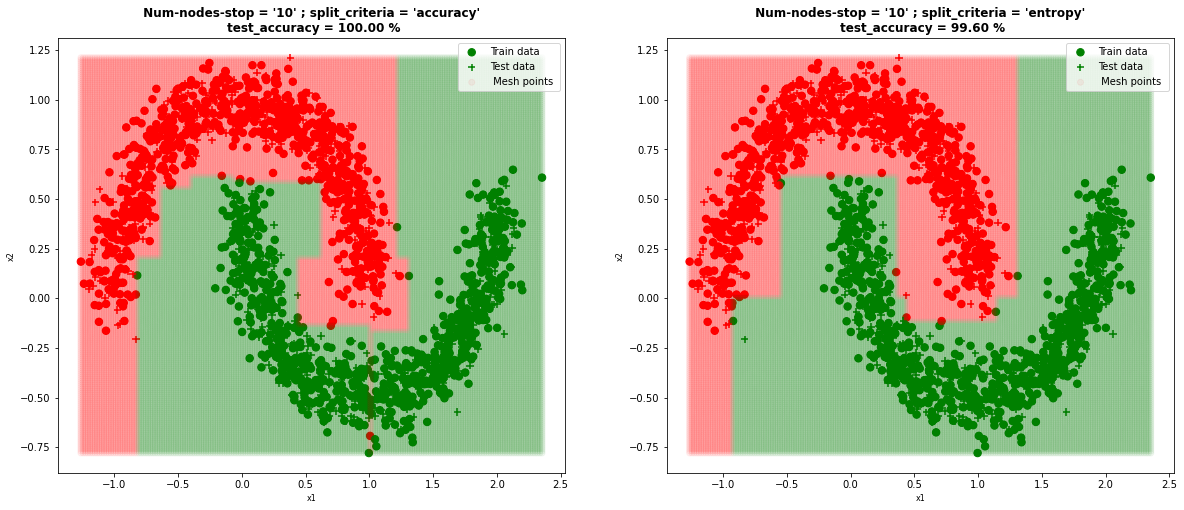

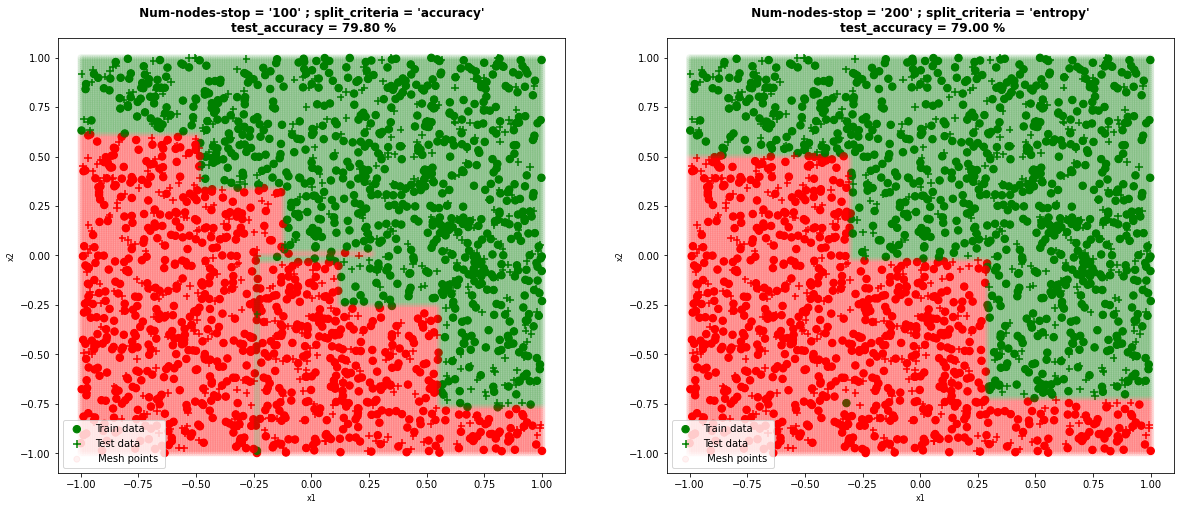

In [42]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and dataset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2

def plot_learned_dtree(data_array, num_nodes_stop = [], split_criteria = []):

    """ Input : give 3 kernels and their corresponding kernel parameter """
    """ Output: Plots will be generated for given data """

    train_X, train_Y, test_X, test_Y = data_array

    # -1 = red, 1 = green
    colors = np.array(['green','green','red'])

    plt.figure(figsize = (20,8))
    
    for i, (stop_nodes, split_criterion) in enumerate(zip(num_nodes_stop, split_criteria)):

        plt.subplot(1,2,i+1)
        
        # getting the alphas
        Learned_Trees = train_decision_tree( data_array[0], data_array[1], num_nodes_stop= stop_nodes, criterion= split_criterion)
        pred_test = eval_decision_tree(Learned_Trees, test_X = data_array[2]).astype(np.int32)
        pred_train = eval_decision_tree(Learned_Trees, test_X = data_array[0]).astype(np.int32)

        test_accuracy = (sum(pred_test == test_Y)*100)/len(test_Y)

        plt.scatter(train_X[:,0], train_X[:,1], marker = "o", c = colors[pred_train], s = 55, label = f"Train data ")
        plt.scatter(test_X[:,0], test_X[:,1], marker = "+", c = colors[pred_test], s = 55, label = f"Test data ")

        # plotting the learned classifiers
        full_X1 = np.linspace( min( min(train_X[:,0]), min(test_X[:,0]) ) , max( max(train_X[:,0]), max(test_X[:,0]) ), 200 )
        full_X2 = np.linspace( min( min(train_X[:,1]), min(test_X[:,1]) ) , max( max(train_X[:,1]), max(test_X[:,1]) ), 200 )
        
        # creating mesh
        mesh_x1, mesh_x2 = np.meshgrid(full_X1, full_X2)
        mesh_x1 = mesh_x1.reshape(-1,1); mesh_x2 = mesh_x2.reshape(-1,1)

        # creating mesh points and its corresponding value
        mesh_points = np.hstack((mesh_x1,mesh_x2))
        mesh_pred = eval_decision_tree(Learned_Trees, test_X = mesh_points).astype(np.int32)
        plt.scatter(mesh_points[:,0], mesh_points[:,1], c = colors[mesh_pred], label = f" Mesh points ", alpha = 0.05)

        plt.title(f" Num-nodes-stop = '{stop_nodes}' ; split_criteria = '{split_criterion}' \n test_accuracy = {test_accuracy:.2f} %", fontweight = 'bold', size = 12)
        plt.xlabel("x1", size = 8); plt.ylabel("x2", size = 8) 
        plt.legend(loc = 'best')
    
    plt.show()

plot_learned_dtree(data_arr_A, num_nodes_stop = [10,10], split_criteria = ["accuracy", "entropy"])
plot_learned_dtree(data_arr_B, num_nodes_stop = [100,200], split_criteria = ["accuracy", "entropy"])


**Cell type : TextRead**


# 7 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [107]:
# CodeWrite cell
# Write Random Forest classifier. 

def best_random_split(data, y_data, criteria = 'accuracy', b = 1 ):
    """ Inputs :
    # Returns the best split among the all dimensions
    # data should be (n,d) matrix
    # b -> should be from (0 to 1) """

    n,d = data.shape
    error_criteria = np.array([0 for i in range(d)], dtype  = np.float64) # to store the max accuracy among all dimensions
    thresholds = np.array([0 for i in range(d)], dtype  = np.float64) # to store the threshold for error_criteria among all dimensions
    split_width = np.array([0 for i in range(d)], dtype = np.float64) # to store the split width we will have at each dim for the best threshold

    # Now getting the required dims to use here
    b = b*d if b <= 1 else b
    dims = np.array([x for x in range(d)]); np.random.shuffle(dims)

    required_dims = set(dims[:int(b)])

    for i in range(d):
        
        # only calculate if it is in required dim
        if i in required_dims :
            error_criteria[i], thresholds[i], split_width[i] = find_split_at_dim_d(data, y_data, dim = i, criteria = criteria)
        else:
            error_criteria[i], thresholds[i], split_width[i] = float('inf'), -1, 0
    
    # index at which maximum criteria occurs
    min_ind = np.argmin(error_criteria)
    min_error = error_criteria[min_ind]
    
    # getting the split_width at that position
    max_split_width = split_width[min_ind]
    
    # choosing the best minima if multiple minima occurs
    for i,v in enumerate(error_criteria):
        if (v == min_error) and (max_split_width < split_width[i]): 
            
            # if better split width is there , we will take that
            max_split_width = split_width[i]; min_ind = i

    
    # returns the maximum index for which best accuracy occurs and the threshold
    return (error_criteria[min_ind], min_ind, thresholds[min_ind])


class RandomForest():

        def __init__(self, criterion = 'accuracy', num_nodes_stop = 1, num_trees = 1, a = 0.5, b = 0.5):

            self.criterion = criterion
            self.num_nodes_stop = num_nodes_stop
            self.num_trees = num_trees
            self.learned_trees = []
            self.a = a
            self.b = b
        
        def eval(self, X, Y = []):

            X_test = X
            # X should be a (n,d) matrix 
            # print(f" Evaluation started !... ")

            pred = []

            for i,v in enumerate(X):

                curr_pred = []

                for curr_tree in self.learned_trees:
                    
                    # only the head is needed
                    curr_tree = curr_tree[0]

                    while curr_tree.NodeClass == None:
                        res = curr_tree.split(v.reshape(1,-1))
                        curr_tree = res[0][0]
                
                    curr_pred.append(self.ind_to_class[curr_tree.NodeClass])

                # getting the most frequent element
                _,counts = np.unique(np.array(curr_pred), return_counts=True)
                pred.append( curr_pred[np.argmax(counts)] )
            
            # converting to a numpy array
            pred = np.array(pred)
            
            if len(Y) == len(X):
                print(f" Accuracy  :  {sum((pred == Y))*100/len(Y):.3f} \n" )
            
            # print(pred)
            return pred

        def train(self, X, Y):
            
            self.X = X
            self.Y = Y

            a = self.a
            b = self.b

            # to store the learned trees
            self.learned_trees = []

            # for class to index conversion
            self.class_to_ind = { x:i for i,x in enumerate(sorted(list(set(Y)))) }
            self.ind_to_class = {y:x for x,y in self.class_to_ind.items()}
            
            # to train all the trees
            for i in range(self.num_trees):

                # getting required dataset
                required_ind = np.random.randint(low = 0, high = len(X), size = int(a*len(X)))
                curr_x = self.X[required_ind]
                curr_y = self.Y[required_ind]

                curr_trees = self.train_one_tree(curr_x, curr_y, b, i+1)
                self.learned_trees.append(curr_trees)
            
            return self.learned_trees
            
        def train_one_tree(self, X, Y, b, tree_num = 0):

            # print(f" tree_number : {tree_num} ", end = "\n")

            """ using bfs to train a Decision-tree """

            X_data_to_train = [np.concatenate((X,Y.reshape(-1,1)), axis = 1)] # contains the data for the node 0
            tree_nodes = [TreeNode()] # to store the particular node of the tree
            tree_ind = 0
            maximum_depth_limit = 0; total_classified_as_pure = 0

            # raise Exception(X_data_to_train[0].shape, X.shape)

            while len(X_data_to_train) > 0 and maximum_depth_limit < 190:

                # to store the data for further nodes
                new_X_data_to_train = []

                # Iterating through all the data
                for i,v in enumerate( X_data_to_train ):

                    curr_tree_node = tree_nodes[tree_ind]
                    
                    # checking if the data is of a pure node or less than min required size
                    if len(set(v[:,-1])) == 1: 
                        curr_tree_node.NodeClass = self.class_to_ind[v[:,-1][0]]
                        # print( f" printing inside a pure node : tree-ind {tree_ind}, len {len(tree_nodes)}, node-class : {curr_tree_node.NodeClass}, elements : {len(v)}" )
                        """ testing done -> passed """
                        total_classified_as_pure += len(v)
                        # print(f"total classified as pure : {total_classified_as_pure}")
                        tree_ind += 1
                        continue

                    elif len(v) <= self.num_nodes_stop:

                        class_counts = -1 ; max_class = -1

                        for i in set(v[:,-1]):
                            if (list(v[:,-1]).count(i) >= class_counts): class_counts = list(v[:,-1]).count(i); max_class = i

                        curr_tree_node.NodeClass = self.class_to_ind[max_class]
                        total_classified_as_pure += len(v)
                        tree_ind += 1
                        # print( f" printing inside a pure node (less data points): tree-ind {tree_ind}, len {len(tree_nodes)}, node-class : {curr_tree_node.NodeClass}, elements : {len(v)}" )
                        """ Testing done -> passed """
                        continue

                    # getting the best split
                    error, min_error_ind, threshold_val = best_random_split( data = v[:,:-1], y_data = v[:,-1], criteria = self.criterion, b = b )

                    # Now creating a tree node for that
                    split_1, split_2 = make_split(min_error_ind, threshold_val, v)
                    curr_tree_node.right = TreeNode()
                    curr_tree_node.left = TreeNode()

                    # Now updating a the tree 
                    curr_tree_node.threshold = threshold_val
                    curr_tree_node.split_dim = min_error_ind

                    # now updating the new_X_data_to_train
                    new_X_data_to_train.append(split_1)
                    new_X_data_to_train.append(split_2)

                    # adding the tree nodes
                    tree_nodes.append(curr_tree_node.right)
                    tree_nodes.append(curr_tree_node.left)

                    # if tree_ind >= 143:
                    #     print( " tree_ind and len(tree) " ,tree_ind, len(tree_nodes) , f" split_1 and 2 len :  {len(split_1)} , {len(split_2)} ; threshold = {threshold_val} ; dim = {min_error_ind}")
                    #     # print(v.shape, set(v[:,0]), len(split_1), len(split_2), sum(v[:,-1] == 1) )
                    #     print(v[:,10], total_classified_as_pure, )
                    #     print(sum(v[:,-1] == 1), sum(v[:,-1] == -1))
                    #     ll
                    """Testing done -> passed"""

                    tree_ind += 1
                
                maximum_depth_limit += 1

                X_data_to_train.clear()
                X_data_to_train = list(new_X_data_to_train)
            
            # print( f" Depth = {maximum_depth_limit} \t", f"total classified as pure : {total_classified_as_pure*100/ len(X):.2f} % ")
            
            return tree_nodes


def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1, 
                        criterion='accuracy', a=0.5, b=0.5):
    """ Returns a random forest trained on X and Y. 
    Trains num_trees.
    Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Fraction of data used per tree = a
    Fraction of features used in each node = b
    Returns a random forest (In whatever format that you find appropriate)
    """
    rf = RandomForest(criterion = criterion, num_nodes_stop = num_nodes_stop, a = a, b = b, num_trees = num_trees)
    rf.train(X,Y)
    return rf
    

def eval_random_forest(random_forest, test_X):
    """ Takes in a  random forest object (however you want to store it), and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    pred = random_forest.eval(test_X)
    return pred

In [23]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.

num_trees_search = [5, 10, 20, 50, 100]
num_nodes_search = [1]

print("Criterion : accuracy | a = 0.5 | b = 0.5 ")

for (data_array,data_name) in zip([data_arr_A, data_arr_B, data_arr_C, data_arr_D],["data_arr_A","data_arr_B","data_arr_C","data_arr_D"]):

    print(f"Training for dataset : {data_name}")
    train_X, train_Y, test_X, test_Y = data_array

    val_ind = np.random.randint(0,len(train_X), int(0.15*len(train_X)) )
    val_X, val_Y = train_X[val_ind], train_Y[val_ind]

    best_trees, best_num_nodes, best_criteria = -1, -1, -1
    max_accuracy = 0

    for n_estimators in num_trees_search:

        # searching through all trees sizes
        d = {}
        print(f"\n N trees = {n_estimators} ")
        # print(f"Structure of output is : {{num nodes : (test_accuracy, train_accuracy, validation_accuracy)}} ")
        d['num_nodes_stop'] = {}


        for num_nodes_stop in num_nodes_search:

            for cri in ['accuracy',"entropy"]:

                Learned_Trees = train_random_forest(train_X, train_Y, criterion = cri, num_nodes_stop = num_nodes_stop, a = 0.5, b = 0.5, num_trees = n_estimators)

                # predicting the values
                y_test_predict = eval_random_forest(Learned_Trees, test_X)
                y_val_predict = eval_random_forest(Learned_Trees, val_X)
                y_train_predict = eval_random_forest(Learned_Trees, train_X)
                
                test_accu = sum(y_test_predict == test_Y)*100/len(test_Y)
                train_accu = sum(y_train_predict == train_Y)*100/len(train_Y)
                val_accu = sum(y_val_predict == val_Y)*100/len(val_Y)

                # storing best accuracy and its hyper parameters
                if val_accu > max_accuracy:
                    max_accuracy = val_accu; best_trees = n_estimators; best_num_nodes = num_nodes_stop; best_criteria = cri

                d['num_nodes_stop'][num_nodes_stop] = (round(test_accu,3), round(train_accu,3), round(val_accu,3))

                print(f" criterion : {cri} | Num nodes Stop = {num_nodes_stop} | \t test accuracy : {test_accu:.3f} | \t val accuracy : {val_accu:.3f} | \t train accuracy : {train_accu:.3f}")
        
        # print(*[{x : d['num_nodes_stop'][x]} for x in num_nodes_search], sep = '  |  ')
    
    print(f"\nBest validation accuracy occurred at : 'num_trees = {best_trees}' and 'num_nodes_stop = {best_num_nodes}' and criteria : {best_criteria}\n")

    print("--------------------------------------------------------------------------------------------------------------------------------------------")

Criterion : accuracy | a = 0.5 | b = 0.5 
Training for dataset : data_arr_A

 N trees = 5 
 criterion : accuracy | Num nodes Stop = 1 | 	 test accuracy : 96.000 | 	 val accuracy : 97.333 | 	 train accuracy : 96.733
 criterion : entropy | Num nodes Stop = 1 | 	 test accuracy : 94.400 | 	 val accuracy : 96.000 | 	 train accuracy : 94.267

 N trees = 10 
 criterion : accuracy | Num nodes Stop = 1 | 	 test accuracy : 97.200 | 	 val accuracy : 97.333 | 	 train accuracy : 96.467
 criterion : entropy | Num nodes Stop = 1 | 	 test accuracy : 98.800 | 	 val accuracy : 98.667 | 	 train accuracy : 98.200

 N trees = 20 
 criterion : accuracy | Num nodes Stop = 1 | 	 test accuracy : 98.200 | 	 val accuracy : 99.556 | 	 train accuracy : 98.600
 criterion : entropy | Num nodes Stop = 1 | 	 test accuracy : 98.000 | 	 val accuracy : 98.667 | 	 train accuracy : 98.333

 N trees = 50 
 criterion : accuracy | Num nodes Stop = 1 | 	 test accuracy : 96.600 | 	 val accuracy : 98.667 | 	 train accuracy : 96.

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

- <u>***Observations***</u>

- *`Entropy metric is able to perform well`* than accuracy metric in most of the datasets

- It is not always true that, with increase in number of tress, zero-one error decreases

- <u>***Dataset A***</u>: There is not much change in zero-one error with increase in number of trees, As dataset A is easily separable, almost most hyper-parameters performs well in the dataset.

- <u>***Dataset B***</u>: The maximum validation is only upto 80%, which shows the dataset is not very easily separable and also potential outliers in the dataset which can cause error in predictions. This also shows us that all the dimensions in this dataset is important for making predictions.

- <u>***Dataset C***</u>: With random-forest even accuracy criteria is able to get around 80% in this dataset (previously with decision tree, we were able to get only upto 55% with accuracy). Which shows the "robustness of RF" in complex dataset, with potential outliers and many dimensions.
Still entropy got better validation accuracy in this dataset

- <u>***Dataset D***</u>: Surprisingly, In this dataset, very low number of trees able to perform as good as large number of trees. Which shows there is not much over-fitting problem with this dataset. As this is a multi-class dataset, this can prove that RF robust even for multi-class classification problems

- <u>***Error Table***</u>

| Dataset / hyper-params | error-type | n_trees | test-accuracy | test-error | train-error
| --- | --- | --- | --- | --- | --- |
|**Dataset_A**|entropy|100|98.40|0.016| 0.015 |
|**Dataset_B**|entropy|20|73.00|0.270| 0.220 |
|**Dataset_C**|entropy|100|85.18|0.148| 0.116 |
|**Dataset_D**|entropy|5|88.16|0.117| 0.082 |

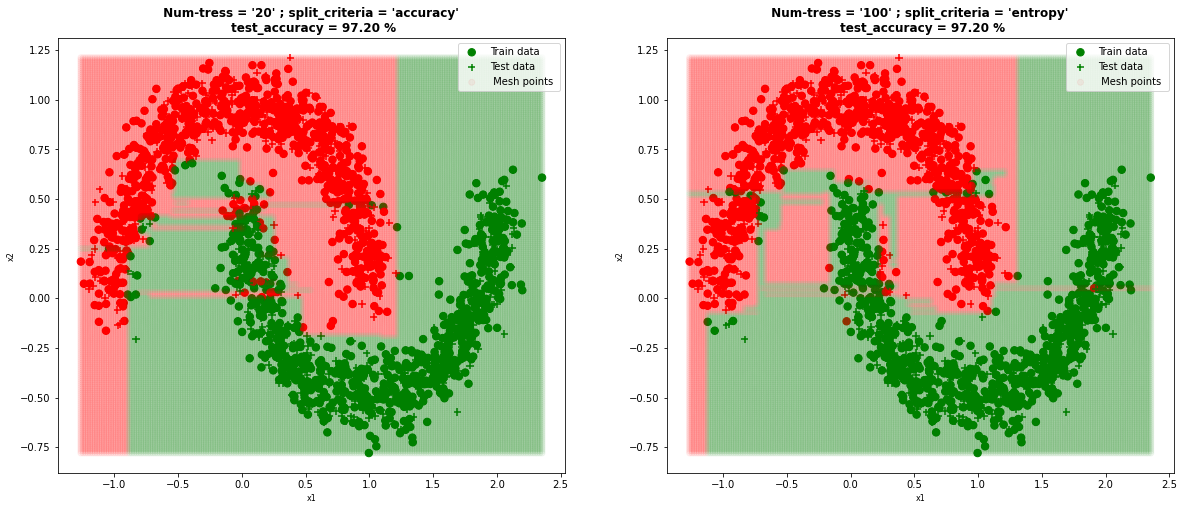

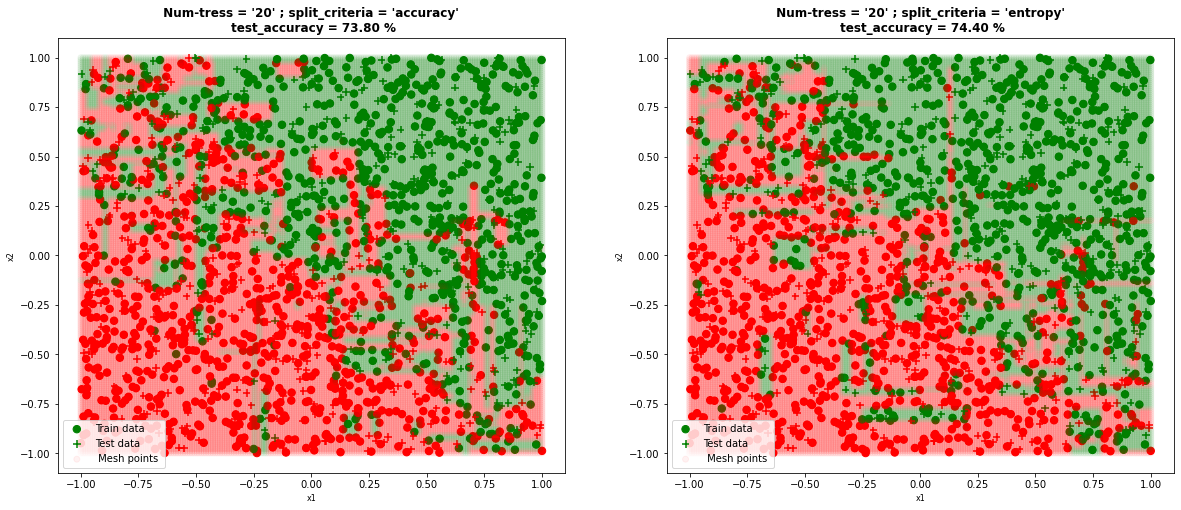

In [43]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

def plot_learned_Random_Forest(data_array, number_of_trees = [], split_criteria = []):

    """ Input : give 3 kernels and their corresponding kernel parameter """
    """ Output: Plots will be generated for given data """

    train_X, train_Y, test_X, test_Y = data_array

    # -1 = red, 1 = green
    colors = np.array(['green','green','red'])

    plt.figure(figsize = (20,8))
    
    for i, (n_trees, split_criterion) in enumerate(zip(number_of_trees, split_criteria)):

        plt.subplot(1,2,i+1)
        
        # getting the alphas
        Learned_Trees = train_random_forest( data_array[0], data_array[1], num_trees = n_trees, criterion= split_criterion)
        pred_test = eval_random_forest(Learned_Trees, test_X = data_array[2]).astype(np.int32)
        pred_train = eval_random_forest(Learned_Trees, test_X = data_array[0]).astype(np.int32)

        test_accuracy = (sum(pred_test == test_Y)*100)/len(test_Y)

        plt.scatter(train_X[:,0], train_X[:,1], marker = "o", c = colors[pred_train], s = 55, label = f"Train data ")
        plt.scatter(test_X[:,0], test_X[:,1], marker = "+", c = colors[pred_test], s = 55, label = f"Test data ")

        # plotting the learned classifiers
        full_X1 = np.linspace( min( min(train_X[:,0]), min(test_X[:,0]) ) , max( max(train_X[:,0]), max(test_X[:,0]) ), 200 )
        full_X2 = np.linspace( min( min(train_X[:,1]), min(test_X[:,1]) ) , max( max(train_X[:,1]), max(test_X[:,1]) ), 200 )
        
        # creating mesh
        mesh_x1, mesh_x2 = np.meshgrid(full_X1, full_X2)
        mesh_x1 = mesh_x1.reshape(-1,1); mesh_x2 = mesh_x2.reshape(-1,1)

        # creating mesh points and its corresponding value
        mesh_points = np.hstack((mesh_x1,mesh_x2))
        mesh_pred = eval_random_forest(Learned_Trees, test_X = mesh_points).astype(np.int32)
        plt.scatter(mesh_points[:,0], mesh_points[:,1], c = colors[mesh_pred], label = f" Mesh points ", alpha = 0.05)

        plt.title(f" Num-tress = '{n_trees}' ; split_criteria = '{split_criterion}' \n test_accuracy = {test_accuracy:.2f} %", fontweight = 'bold', size = 12)
        plt.xlabel("x1", size = 8); plt.ylabel("x2", size = 8)
        plt.legend(loc = 'best')
    
    plt.show()

plot_learned_Random_Forest(data_arr_A, number_of_trees = [20,100], split_criteria = ["accuracy", "entropy"])
plot_learned_Random_Forest(data_arr_B, number_of_trees = [20,20], split_criteria = ["accuracy", "entropy"])


**Cell type : TextRead**

# 8 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree 
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [85]:
# Codewrite cell
# Write code to run here (no plotting)
class Weak_learner_Dtree():

        def __init__(self, criterion = 'accuracy', num_nodes_stop = 1,):

            self.criterion = criterion
            self.num_nodes_stop = num_nodes_stop
            self.learned_trees = []
        
        def eval(self, X, Y = [], notify = False):

            X_test = X
            # X should be a (n,d) matrix 
            if notify == True : print(f" Evaluation started !... ")

            pred = []

            for i,v in enumerate(X):
                
                curr_tree = self.learned_trees[0]
                
                while curr_tree.NodeClass == None:
                    res = curr_tree.split(v.reshape(1,-1))
                    # print(res)
                    curr_tree = res[0][0]
                
                pred.append(self.ind_to_class[curr_tree.NodeClass])
            
            # converting to a numpy array
            pred = np.array(pred)
            
            if len(Y) == len(X) and notify == True:
                print(f" Accuracy  :  {sum((pred == Y))*100/len(Y):.3f} \n" )
            
            # print(pred)
            return pred
            
        def train(self, X, Y, max_depth, notify = False):

            self.learned_trees = []
            if notify : print(" \n Training started... ")

            self.X = X
            self.Y = Y
            self.class_to_ind = { x:i for i,x in enumerate(sorted(list(set(Y)))) }
            self.ind_to_class = {y:x for x,y in self.class_to_ind.items()}

            # print(f" class to index : {self.class_to_ind} , {Y.reshape(-1,1).shape}")

            """ using bfs to train a Decision-tree """

            X_data_to_train = [np.concatenate((X,Y.reshape(-1,1)), axis = 1)] # contains the data for the node 0
            tree_nodes = [TreeNode()] # to store the particular node of the tree
            tree_ind = 0
            depth = 0; total_classified_as_pure = 0

            # raise Exception(X_data_to_train[0].shape, X.shape)

            while len(X_data_to_train) > 0 and depth <= max_depth:

                # to store the data for further nodes
                new_X_data_to_train = []

                # Iterating through all the data
                for i,v in enumerate( X_data_to_train ):

                    curr_tree_node = tree_nodes[tree_ind]
                    
                    # checking if the data is of a pure node or less than min required size
                    if len(set(v[:,-1])) == 1: 
                        curr_tree_node.NodeClass = self.class_to_ind[v[:,-1][0]]
                        # print( f" printing inside a pure node : tree-ind {tree_ind}, len {len(tree_nodes)}, node-class : {curr_tree_node.NodeClass}, elements : {len(v)}" )
                        """ testing done -> passed """
                        total_classified_as_pure += len(v)
                        # print(f"total classified as pure : {total_classified_as_pure}")
                        tree_ind += 1
                        continue

                    elif len(v) <= self.num_nodes_stop or depth == max_depth:

                        class_counts = -1 ; max_class = -1

                        for i in set(v[:,-1]):
                            if (list(v[:,-1]).count(i) >= class_counts): class_counts = list(v[:,-1]).count(i); max_class = i

                        curr_tree_node.NodeClass = self.class_to_ind[max_class]
                        total_classified_as_pure += len(v)
                        tree_ind += 1
                        continue

                    # getting the best split
                    error, min_error_ind, threshold_val = best_split( data = v[:,:-1], y_data = v[:,-1], criteria = self.criterion )

                    # Now creating a tree node for that
                    split_1, split_2 = make_split(min_error_ind, threshold_val, v)
                    curr_tree_node.right = TreeNode()
                    curr_tree_node.left = TreeNode()

                    # Now updating a the tree 
                    curr_tree_node.threshold = threshold_val
                    curr_tree_node.split_dim = min_error_ind

                    # now updating the new_X_data_to_train
                    new_X_data_to_train.append(split_1)
                    new_X_data_to_train.append(split_2)

                    # adding the tree nodes
                    tree_nodes.append(curr_tree_node.right)
                    tree_nodes.append(curr_tree_node.left)

                    tree_ind += 1
                
                depth += 1

                X_data_to_train.clear()
                X_data_to_train = list(new_X_data_to_train)
            
            if notify : print( f" Depth = {depth} ", f"total classified as pure : {total_classified_as_pure} \n")
            self.learned_trees = tree_nodes
            
            return tree_nodes

def calculate_gamma(w_t, h_t, y_truth):
    gamma = (1/2)  - np.sum(w_t[h_t != y_truth]) / (np.sum(w_t))
    return gamma

def calculate_beta(gamma):
    # 1e-6 for numerical stability
    return (0.5 + gamma)/( (0.5 - gamma) + abs(1e-7) )

def calculate_l(h_t, y_truth):
    return (h_t != y_truth)

def calculate_normalized_weights(w_t, beta, l_t):

    weights =  (w_t) * (beta**(np.where( l_t == True, 1, 0)))
    # print( beta )
    # print( w_t[0] , (beta**(np.where( l_t == True, 1, 0)))[l_t == True], weights[l_t == False],)
    # ll
    """ Passed - verified """

    normalized_weights = weights / sum(weights)
    return normalized_weights

def train_weak_learner(X_train, Y_train, weights, depth, notify = False):

    Dtree_t = Weak_learner_Dtree()

    # sampling based on train indices
    train_indices = np.random.choice( np.arange(len(Y_train)), size = len(Y_train), p = weights)

    X = X_train[train_indices]
    Y = Y_train[train_indices]

    Dtree_t.train(X, Y, max_depth = depth, notify = notify)

    return Dtree_t

def get_ht(Weak_learner, X):
    h_t = Weak_learner.eval(X)
    return h_t

def get_max_class(pred):

    # pred is a List[dict]
    y_pred_class = [0 for i in range(len(pred))]

    for i,k_class in enumerate(pred):

        max_class = -1
        max_weight = -1

        for c,w in k_class.items():
            if w > max_weight : max_class = c; max_weight = w

        # storing the max_class
        y_pred_class[i] = max_class
    
    return np.array(y_pred_class)
    

def evaluate_Ada_boost(Weak_learners, Betas, X_test, Y_test = [], return_loss_at_iterations = False):

    # y prediction, initially dictionary to store each class prediction
    y_pred = [{} for i in range(len(X_test))]
    y_test_pred = [0 for i in range(len(X_test))]

    if return_loss_at_iterations: 
        y_pred_error = []
        # y_pred_iterations = [[] for i in range(len(X_test))]

    for wl,b in zip(Weak_learners, Betas):
        
        # predicting
        pred = wl.eval(X_test)

        # storing the weight for each class
        for i,j in enumerate(pred):
            y_pred[i][j] = y_pred[i][j] + np.log(b + (1e-7) ) if j in y_pred[i] else np.log(b + (1e-7) )

        # checking loss at each iteration
        if return_loss_at_iterations:
            y_iter_pred = get_max_class(y_pred)
            y_pred_error.append( 1 - (sum(y_iter_pred == Y_test)/len(Y_test)) )
    
    return get_max_class(y_pred) if return_loss_at_iterations == False else (get_max_class(y_pred), np.array(y_pred_error))

def train_Ada_boost(X_data, Y_data, depth, iterations, notify = False, return_loss = False, X_test = [], Y_test = []):

    # initial weights for each data points
    weights = np.array([1/len(X_data) for x in range(len(Y_data))])

    # for storing the learners and Betas
    Weak_learners = []
    Betas = []

    if return_loss: 
        test_errors, train_errors = [], []

    for epoch in range(iterations):

        current_learner = train_weak_learner(X_data, Y_data, weights, depth, notify = notify)

        # appending to the set of weak learners
        Weak_learners.append(current_learner)

        # getting h_t
        h_t = get_ht(current_learner, X_data)

        # getting gamma
        gamma_t = calculate_gamma(weights, h_t, Y_data)

        # getting beta
        if (gamma_t - 0.5)**2 < 0.001 : 
            print("Gamma became 0.5, so stopping iteration")
            Betas.append(1e10)
            if return_loss : test_errors.append(0); train_errors.append(0)
            return (Weak_learners, Betas) if return_loss == False else (Weak_learners, Betas, test_errors, train_errors)
        
        beta_t = calculate_beta(gamma_t)
        Betas.append(beta_t)

        # getting l_t
        l_t = calculate_l(h_t, Y_data)

        if return_loss:

            # getting the loss
            train_pred = evaluate_Ada_boost(Weak_learners, Betas, X_data)
            test_pred = evaluate_Ada_boost(Weak_learners, Betas, X_test)

            test_errors.append(1 - (sum(Y_test == test_pred)/len(Y_test)) )
            train_errors.append(1 - (sum(Y_data == train_pred)/len(Y_data)) )

        # updating weights
        weights = calculate_normalized_weights( weights, beta_t, l_t)
    
    return (Weak_learners, Betas) if return_loss == False else (Weak_learners, Betas, test_errors, train_errors)

In [93]:
learners,betas = train_Ada_boost(data_arr_A[0], data_arr_A[1], depth = 7, iterations = 50, notify = False)
y_test_pred_a = evaluate_Ada_boost(learners, betas, data_arr_A[2])
print( f"Dataset A , accuracy with depth = 7 :  {sum(data_arr_A[3] == y_test_pred_a)*100/len(y_test_pred_a):.3f} " )

learners,betas = train_Ada_boost(data_arr_B[0], data_arr_B[1], depth = 3, iterations = 50, notify = False)
y_test_pred_b = evaluate_Ada_boost(learners, betas, data_arr_B[2])
print( f"Dataset B , accuracy with depth = 3 :  {sum(data_arr_B[3] == y_test_pred_b)*100/len(y_test_pred_b):.3f} " )

learners,betas = train_Ada_boost(data_arr_C[0], data_arr_C[1], depth = 7, iterations = 50, notify = False)
y_test_pred_c = evaluate_Ada_boost(learners, betas, data_arr_C[2])
print( f"Dataset C , accuracy with depth = 7 :  {sum(data_arr_C[3] == y_test_pred_c)*100/len(y_test_pred_c):.3f} " )

learners,betas = train_Ada_boost(data_arr_D[0], data_arr_D[1], depth = 7, iterations = 50, notify = False)
y_test_pred_d = evaluate_Ada_boost(learners, betas, data_arr_D[2])
print( f"Dataset D , accuracy with depth = 7 :  {sum(data_arr_D[3] == y_test_pred_d)*100/len(y_test_pred_d):.3f} " )

Gamma became 0.5, so stopping iteration
Dataset A , accuracy with depth = 7 :  99.200 
Dataset B , accuracy with depth = 3 :  79.000 
Dataset C , accuracy with depth = 7 :  94.613 
Dataset D , accuracy with depth = 7 :  95.266 


  0%|          | 0/50 [00:00<?, ?it/s]


Gamma became 0.5, so stopping iteration


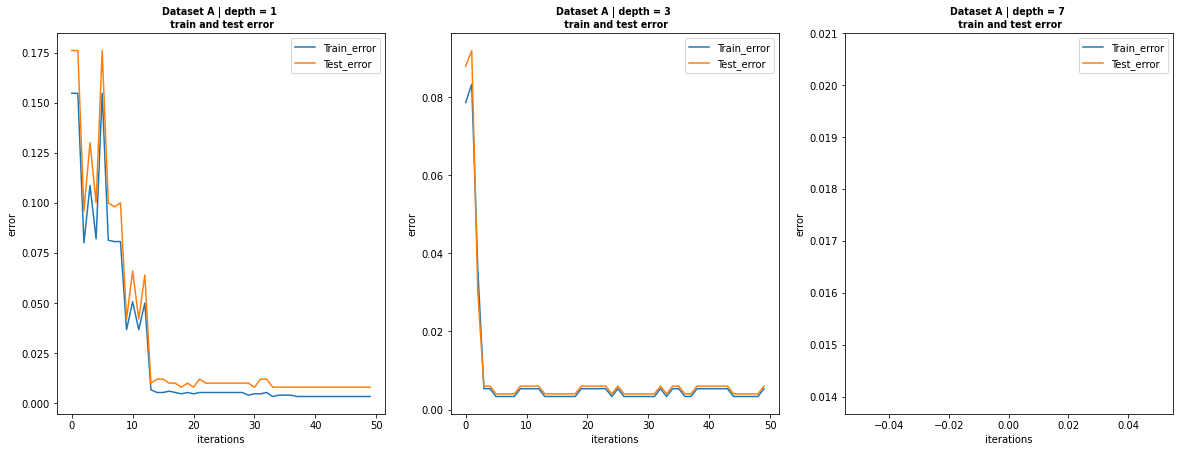

100%|██████████| 50/50 [00:07<00:00,  6.36it/s]


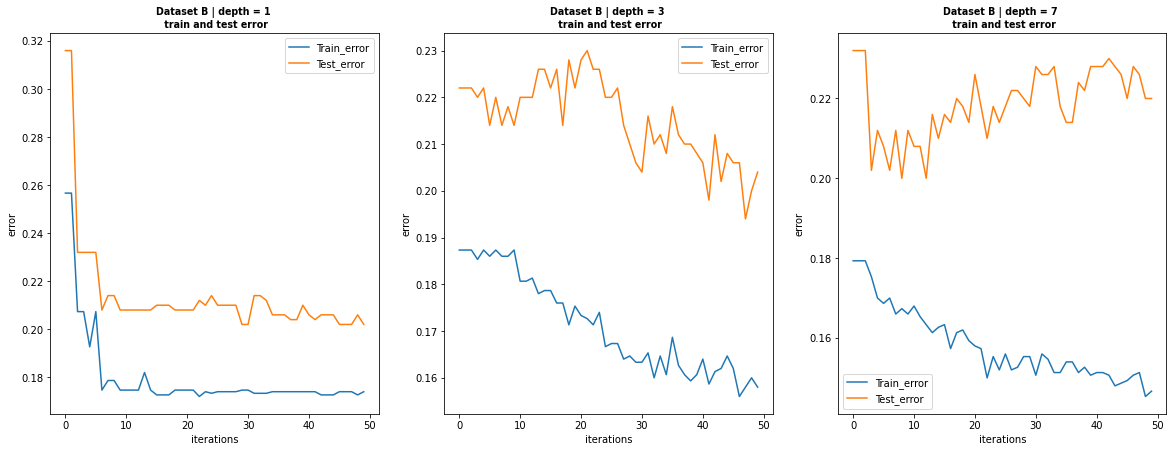

100%|██████████| 50/50 [00:58<00:00,  1.16s/it]


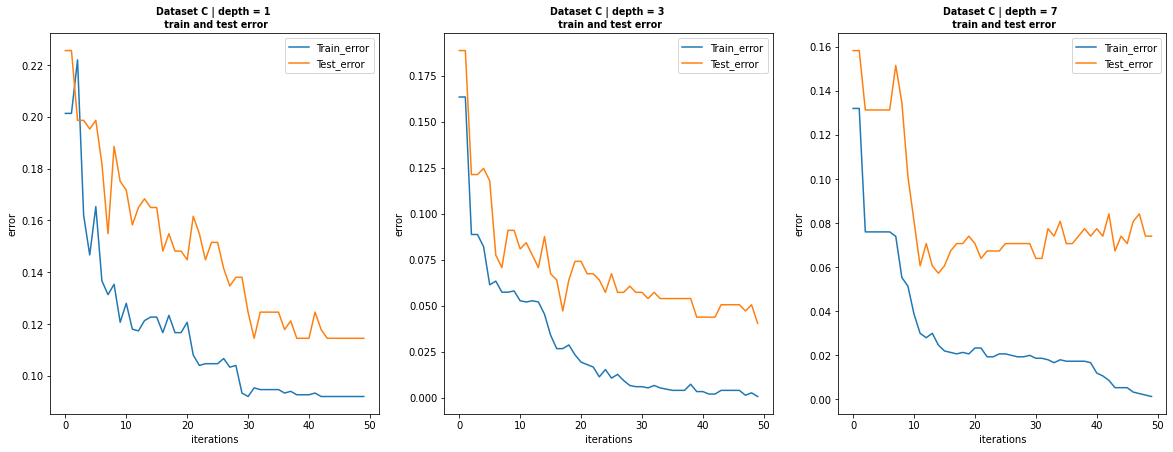

100%|██████████| 50/50 [00:08<00:00,  6.08it/s]


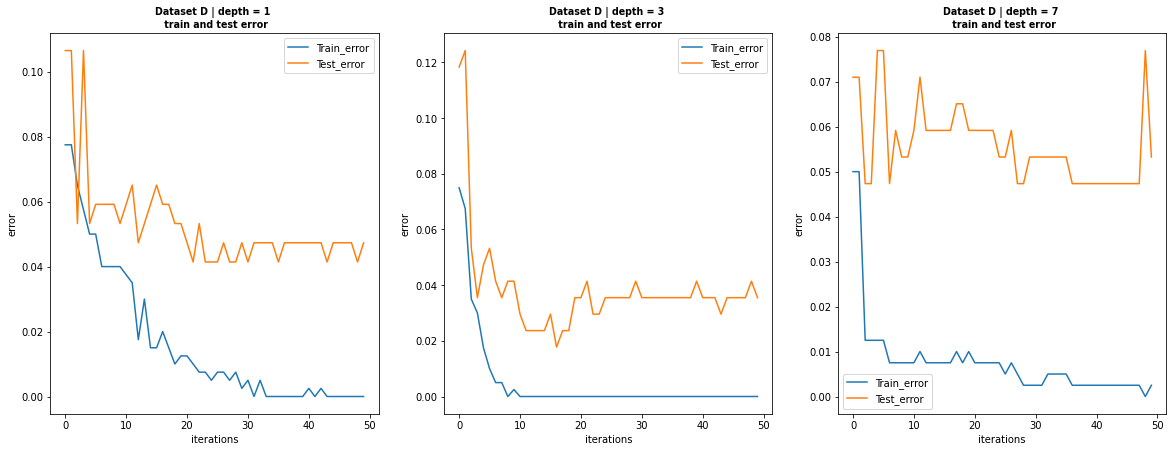

In [80]:
# Codewrite cell 
# Plots for iteration vs error here

def plot_learned_AdaBoost(data_array, data_name, tree_depth = [1,3,7] ):

    """ Input : give the data array and tree depth  """
    """ Output: Plots will be generated for given data """

    train_X, train_Y, test_X, test_Y = data_array

    plt.figure(figsize = (20,7))

    for i,max_depth in enumerate(tree_depth):
        (learners,betas) = train_Ada_boost(train_X, train_Y, depth = max_depth, iterations = 50, notify = False, 
                                                                 return_loss = False, X_test = test_X, Y_test = test_Y)
        
        (_,train_error) = evaluate_Ada_boost(learners, betas, train_X, train_Y,  return_loss_at_iterations = True)
        (_,test_error) = evaluate_Ada_boost(learners, betas, test_X, test_Y,  return_loss_at_iterations = True)

        plt.subplot(1,3, i+1)
        plt.plot(train_error, label = "Train_error")
        plt.plot(test_error, label = "Test_error")

        plt.title(F"{data_name} | depth = {max_depth} \n train and test error", fontweight = 'bold', size = 9.5)
        plt.xlabel("iterations")
        plt.ylabel("error")
        plt.legend(loc = 'best')
    
    plt.show()

plot_learned_AdaBoost(data_array = data_arr_A, data_name = "Dataset A", tree_depth = [1,3,7] )
plot_learned_AdaBoost(data_array = data_arr_B, data_name = "Dataset B", tree_depth = [1,3,7] )
plot_learned_AdaBoost(data_array = data_arr_C, data_name = "Dataset C", tree_depth = [1,3,7] )
plot_learned_AdaBoost(data_array = data_arr_D, data_name = "Dataset D", tree_depth = [1,3,7] )

Gamma became 0.5, so stopping iteration


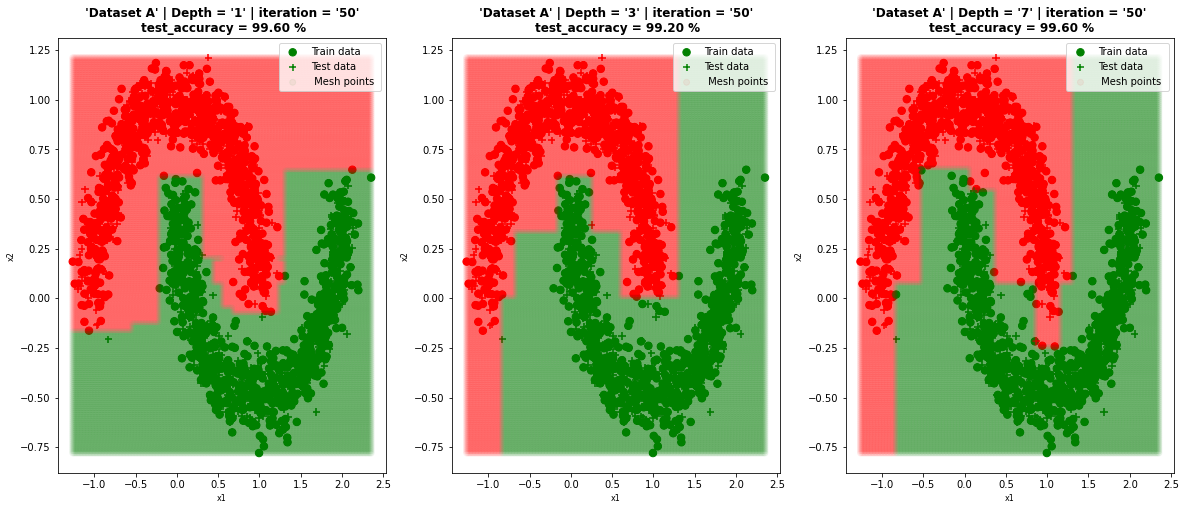

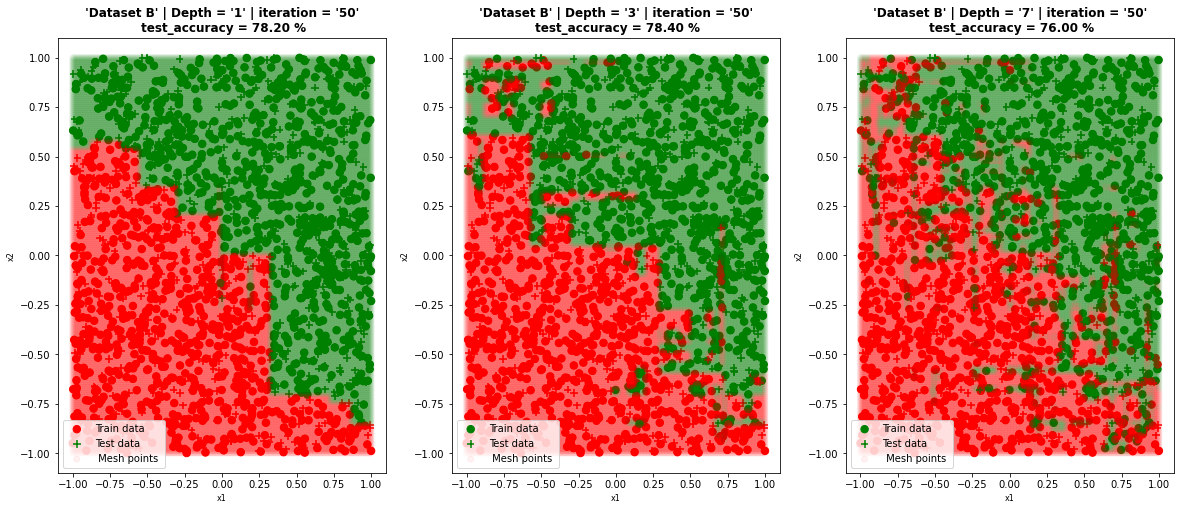

In [84]:
# Codewrite cell 
# Plots for illustrating the classifier here

def plot_learned_AdaBoost(data_array, data_name ,depth = [1,3,7],):

    """ Input : give 3 kernels and their corresponding kernel parameter """
    """ Output: Plots will be generated for given data """

    train_X, train_Y, test_X, test_Y = data_array

    # -1 = red, 1 = green
    colors = np.array(['green','green','red'])

    plt.figure(figsize = (20,8))
    
    for i, max_depth in enumerate(depth):

        plt.subplot(1,3,i+1)

        # learners,betas = train_Ada_boost(data_arr_D[0], data_arr_D[1], depth = 3, iterations = 50, notify = False)
        # y_test_pred_a = evaluate_Ada_boost(learners, betas, data_arr_D[2])
        
        # getting the alphas
        learners, betas = train_Ada_boost(train_X, train_Y, depth = max_depth, iterations = 50, notify = False)
        pred_test = evaluate_Ada_boost(learners, betas, test_X).astype(np.int32)
        pred_train = evaluate_Ada_boost(learners, betas, train_X).astype(np.int32)

        test_accuracy = (sum(pred_test == test_Y)*100)/len(test_Y)
        train_accuracy = (sum(pred_train == train_Y)*100)/len(train_Y)

        plt.scatter(train_X[:,0], train_X[:,1], marker = "o", c = colors[pred_train], s = 55, label = f"Train data ")
        plt.scatter(test_X[:,0], test_X[:,1], marker = "+", c = colors[pred_test], s = 55, label = f"Test data ")

        # plotting the learned classifiers
        full_X1 = np.linspace( min( min(train_X[:,0]), min(test_X[:,0]) ) , max( max(train_X[:,0]), max(test_X[:,0]) ), 200 )
        full_X2 = np.linspace( min( min(train_X[:,1]), min(test_X[:,1]) ) , max( max(train_X[:,1]), max(test_X[:,1]) ), 200 )
        
        # creating mesh
        mesh_x1, mesh_x2 = np.meshgrid(full_X1, full_X2)
        mesh_x1 = mesh_x1.reshape(-1,1); mesh_x2 = mesh_x2.reshape(-1,1)

        # creating mesh points and its corresponding value
        mesh_points = np.hstack((mesh_x1,mesh_x2))
        mesh_pred = evaluate_Ada_boost(learners, betas, X_test = mesh_points).astype(np.int32)
        plt.scatter(mesh_points[:,0], mesh_points[:,1], c = colors[mesh_pred], label = f" Mesh points ", alpha = 0.05)

        plt.title(f" '{data_name}' | Depth = '{max_depth}' | iteration = '50' \n test_accuracy = {test_accuracy:.2f} %", fontweight = 'bold', size = 12)
        plt.xlabel("x1", size = 8); plt.ylabel("x2", size = 8)
        plt.legend(loc = 'best')
    
    plt.show()

plot_learned_AdaBoost(data_arr_A, data_name = "Dataset A" ,depth = [1,3,7])
plot_learned_AdaBoost(data_arr_B, data_name = "Dataset B" ,depth = [1,3,7])

Textwrite cell:

- <u>***Observation***</u>

- As the maximum depth of the weak learners increases, in general the prediction accuracy increases ( for example in Dataset A , in one iteration Weak leaner is able to perform good). Similarly even in other datasets, as the depth increases the number of iterations required for good prediction decreases

- With number of iteration, the error always decrease ;  But after some point it saturates. But the there is not guarantee about test error. Usually Test error is little higher than train error But with iterations it also decrease and becomes saturated

- For complex dataset like Dataset C, weak learners with higher depth is able to perform well than others

- <u>***Error Table***</u>

| Dataset / hyper-params | error-type | depth | test-accuracy | train-accuracy
| --- | --- | --- | --- | --- |
|**Dataset_A**|accuracy|7|99.60| 99.99 |
|**Dataset_B**|accuracy|3|78.42| 84.67 |
|**Dataset_C**|accuracy|7|96.26| 99.64 |
|**Dataset_D**|accuracy|7|96.45| 99.81 |

- For complex Datasets, like dataset C and D - AdaBoost able to perform well than other models (Dtree - 55% and RandomForest - 85%). This shows AdaBoost is more robust in complex datasets and real world scenarios 

**Cell type : TextRead**

# 9 Lasso Regression

Write code for learning using Lasso Regression and give your conclusions. Use the dataset LassoReg_data.npz for this question. The file contains two matrices of size 120\*1000 and 120\*1, corresponding to 120 instance points with 1000 dimensional features and its targets.

 Split the data into train-validation-test on 50-25-25 ratio. Learn the best model using Lasso Regression (use projected gradient descent, the projection oracle code is given for your convenience). Try different learning rate parameters and L1 norm ball constraint radii. Choose an appropriate learning rate that allows for convergence of the training loss.  Train the models for different L1 norm radius parameters. Choose the L1 norm constraint that works best on the validation set. 

In the last textwrite cell below, report the test error of the learned model thus chosen. Also report the indices and weight values corresponding to the top 10 values of the weight vector (which is 1000 dimensional). 




In [6]:
# Coderead cell

def projection_oracle_l1(w, l1_norm):
    # first remeber signs and store them. Modify w so that it is all positive then.
    signs = np.sign(w)
    w = w*signs
    # project this modified w onto the simplex in first orthant.
    d=len(w)
    # if w is already in l1 norm ball return as it is.
    if np.sum(w)<=l1_norm:
        return w*signs
    
    # using 1e-7 as zero here to avoid foating point issues
    for i in range(d):
        w_next = w+0
        w_next[w>1e-7] = w[w>1e-7] - np.min(w[w>1e-7])
        if np.sum(w_next)<=l1_norm:
            w = ((l1_norm - np.sum(w_next))*w + (np.sum(w) - l1_norm)*w_next)/(np.sum(w)-np.sum(w_next))
            return w*signs
        else:
            w=w_next

# test above code
print (projection_oracle_l1(w=np.array([1.,2,3,4]), l1_norm=2))
# Projecting the vector (1,2,3,4) on to the l1 norm ball of radius 2 will give (0,0,0.5,1.5)

[0.  0.  0.5 1.5]


In [27]:
# codewrite cell:
# Use this cell to do read the data and do preprocessing (split data into train, test, val etc) and write any helper functions you may need 
# like evaluating the mean squared error or the gradient w.r.t. w

def split_data(X,Y,val_split = 0.25, test_split = 0.25):

    train_split = 1 - (val_split + test_split)

    # now creating the train_indices, test indices and val indices
    indices = np.arange(len(X)) ; np.random.shuffle(indices)
    val_start = int(len(X)*train_split) ; test_start = val_start + int(len(X)*val_split) 

    train_indices = indices[:int(len(X)*train_split)]
    val_indices = indices[val_start:val_start+int(len(X)*val_split)]
    test_indices = indices[test_start : test_start + int(len(X)*test_split) ]

    return [ X[train_indices], Y[train_indices], X[val_indices], Y[val_indices], X[test_indices], Y[test_indices] ]

def compute_gradient(X,W,Y):
    """ X - (n,d), W - (d,1), Y - (n,1)"""
    grad_w = (X.T@X)@W - (X.T@Y)
    return grad_w

In [70]:
# codewrite cell:

# Write the code for the gradient descent routine on the training set mean square error loss function.
# Also write code for doing validation of the learned model using the validation set

def train_Lasso_L1(train_X, train_Y, val_X, val_Y, test_X = [], test_Y = [], lr = 1e-3, l1_norm = 1, iterations = 100):

    """lr - learning rate
    l1_norm - projection_oracle l1 radii"""
    """ X - (n,d), Y - (n,1)"""
    W = np.random.uniform(low = 0, high = 1, size = len(train_X[0])).reshape(-1,1)
    # print(W.shape)
    train_Y = train_Y.reshape(-1,1)

    for i in range(iterations):
        # updating the weights
        W_temp = W
        W = projection_oracle_l1( W - lr*compute_gradient(train_X,W,train_Y) , l1_norm )

        if sum((W_temp - W)**2) < 1e-5 : 
            # breaking due to very low change in W
            break

    # Now evaluating on validation set
    train_error = np.mean((train_X@W - train_Y)**2)/len(train_Y)
    val_error = np.mean((val_X@W - val_Y)**2)/len(val_Y)
    if len(test_X) != 0: test_error = np.mean((test_X@W - val_Y)**2)/len(test_Y)
    else: test_error = None

    return (W, train_error, val_error, test_error)

Lasso_train_X, Lasso_train_Y, Lasso_val_X, Lasso_val_Y, Lasso_test_X, Lasso_test_Y = split_data(data_arr_lasso[0], data_arr_lasso[1],val_split = 0.25, test_split = 0.25)

l1_norm = [0.01, 0.1, 0.5,1, 2, 4, 10]
learning_rates = [1e-7, 1e-5, 1e-3, 1e-1, 1, 10]
Iterations = [100, 500]

# storing the best value
lowest_error = float('inf')
best_l1, best_iters, best_lr, best_w = -1, -1, -1, []

# choosing the best hyper params
for l1 in l1_norm:

    l1_lowest_error = float('inf')
    best_l1_local, best_iters_local, best_lr_local, best_w_local = -1, -1, -1, []

    for lr in learning_rates:

        for n_iters in Iterations:

            (learned_w, train_error, val_error, test_error)  = train_Lasso_L1(Lasso_train_X, Lasso_train_Y, Lasso_val_X, Lasso_val_Y, Lasso_test_X, Lasso_test_Y, lr = lr, l1_norm = l1, iterations = n_iters)

            if val_error < lowest_error: 
                lowest_error = val_error
                best_w = learned_w
                best_l1 = l1
                best_iters = n_iters
                best_lr = lr
            
            if val_error < l1_lowest_error: 
                l1_lowest_error = val_error
                best_w_local = learned_w
                best_l1_local = l1
                best_iters_local = n_iters
                best_lr_local = lr
        
    print(f"\nBest hyper-parameters for l1 norm : {l1}")
    print(f"learning rate = {best_lr_local} |\t iterations : {best_iters_local} |\t error : {l1_lowest_error}")
    print(f"----------------------------------------------------------------------------------")



Best hyper-parameters for l1 norm : 0.01
learning rate = 0.1 |	 iterations : 100 |	 error : 0.04359072029163248
----------------------------------------------------------------------------------

Best hyper-parameters for l1 norm : 0.1
learning rate = 1e-07 |	 iterations : 500 |	 error : 0.04352302044695236
----------------------------------------------------------------------------------

Best hyper-parameters for l1 norm : 0.5
learning rate = 1e-07 |	 iterations : 100 |	 error : 0.04382727138236552
----------------------------------------------------------------------------------

Best hyper-parameters for l1 norm : 1
learning rate = 1e-07 |	 iterations : 500 |	 error : 0.0444651212320765
----------------------------------------------------------------------------------

Best hyper-parameters for l1 norm : 2
learning rate = 1e-05 |	 iterations : 500 |	 error : 0.045749246577892574
----------------------------------------------------------------------------------

Best hyper-paramete

In [113]:
print(f" Best value of :  L1_norm = {best_l1} |  Learning rate : {best_lr} | Iterations : {best_iters} ")
print(f" \n Only non-zero value coming at the index {list(best_w).index(best_w.max())} is : {best_w.max():.3f} ")
top_10_values = [ (float(best_w[i]),i) for i,x in enumerate((best_w > 1e-4)) if x == True ]
top_10_values.sort(reverse = True)

print(f" \n Top 10 values : (value, index)", *top_10_values[:10] ,sep = '\n' )

 Best value of :  L1_norm = 0.1 |  Learning rate : 1e-07 | Iterations : 500 
 
 Only non-zero value coming at the index 267 is : 0.011 
 
 Top 10 values : (value, index)
(0.011087562599128796, 267)
(0.010671267576224297, 483)
(0.010534182985101935, 955)
(0.010379974024457792, 635)
(0.010316324397008785, 328)
(0.009071300490775869, 204)
(0.008397967475435577, 750)
(0.008292490388701498, 201)
(0.008204709669584575, 433)
(0.006737229392254214, 96)


#Textwrite cell:

- After training with all sets of parameters, (Iterated L1 for [0.01, 0.1, 0.5,1, 2, 4, 10] and different set of learning rates for each l1_norm)
the best value occurs at ***'L1 norm = 0.1' and 'lr = 1e-7' and 'iterations = 500'***

- Test error at this point : 0.04352 (MSE error)

- <u>***The first 10 weights by values***</u>:

|value| index |
| --- | --- |
|0.01108| 267 |
|0.01067| 483 |
|0.01053| 955 |
|0.01037| 635 |
|0.01031| 328 |
|0.00907| 204 |
|0.00839| 750 |
|0.00829| 201 |
|0.00820| 433 |
|0.00673| 96 |